<a href="https://colab.research.google.com/github/neenjo/ai-and-analytics-p4/blob/main/P2_Medicine_Drug_rating_prediction.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

Data Source Citation:
Felix Gräßer, Surya Kallumadi, Hagen Malberg, and Sebastian Zaunseder. 2018. Aspect-Based Sentiment Analysis of Drug Reviews Applying Cross-Domain and Cross-Data Learning. In Proceedings of the 2018 International Conference on Digital Health (DH '18). ACM, New York, NY, USA, 121-125. DOI:
*italicized text*


# Loader

Loading Data from Google Drive

In [ ]:
from numpy.random import seed
seed(1)

Replace with data loading of your preference.



In [1]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [2]:
#Download this on first time use
import nltk

nltk.download('stopwords')

[nltk_data] Downloading package stopwords to /root/nltk_data...
[nltk_data]   Unzipping corpora/stopwords.zip.


True

Reading Data

In [3]:
path="/content/drive/My Drive/Study/s2 2020/Research Project Personal/Research Project/Data/drugLib_raw/drugLibTrain_raw.tsv"

In [4]:
import pandas as pd
raw_df=pd.read_csv(path,sep='\t')

In [5]:
raw_df.head()

,Unnamed: 0,urlDrugName,rating,effectiveness,sideEffects,condition,benefitsReview,sideEffectsReview,commentsReview
0,2202,enalapril,4,Highly Effective,Mild Side Effects,management of congestive heart failure,slowed the progression of left ventricular dys...,"cough, hypotension , proteinuria, impotence , ...","monitor blood pressure , weight and asses for ..."
1,3117,ortho-tri-cyclen,1,Highly Effective,Severe Side Effects,birth prevention,Although this type of birth control has more c...,"Heavy Cycle, Cramps, Hot Flashes, Fatigue, Lon...","I Hate This Birth Control, I Would Not Suggest..."
2,1146,ponstel,10,Highly Effective,No Side Effects,menstrual cramps,I was used to having cramps so badly that they...,Heavier bleeding and clotting than normal.,I took 2 pills at the onset of my menstrual cr...
3,3947,prilosec,3,Marginally Effective,Mild Side Effects,acid reflux,The acid reflux went away for a few months aft...,"Constipation, dry mouth and some mild dizzines...",I was given Prilosec prescription at a dose of...
4,1951,lyrica,2,Marginally Effective,Severe Side Effects,fibromyalgia,I think that the Lyrica was starting to help w...,I felt extremely drugged and dopey. Could not...,See above


# Feature Selection

In [6]:
basic_df=raw_df.iloc[:,[2,3,4,8]]

In [7]:
basic_df.head(-5)

,rating,effectiveness,sideEffects,commentsReview
0,4,Highly Effective,Mild Side Effects,"monitor blood pressure , weight and asses for ..."
1,1,Highly Effective,Severe Side Effects,"I Hate This Birth Control, I Would Not Suggest..."
2,10,Highly Effective,No Side Effects,I took 2 pills at the onset of my menstrual cr...
3,3,Marginally Effective,Mild Side Effects,I was given Prilosec prescription at a dose of...
4,2,Marginally Effective,Severe Side Effects,See above
...,...,...,...,...
3097,8,Considerably Effective,No Side Effects,"I take one pill in the morning, and one at night."
3098,10,Highly Effective,No Side Effects,My son had been having terrible problems with ...
3099,8,Considerably Effective,Moderate Side Effects,The patient was diagnosed with ADHD after desc...
3100,7,Considerably Effective,Mild Side Effects,"I started with a low dose, then increased the ..."


DIsplaying Count

In [8]:
basic_df['effectiveness'].value_counts()

Highly Effective          1330
Considerably Effective     928
Moderately Effective       415
Ineffective                247
Marginally Effective       187
Name: effectiveness, dtype: int64

In [9]:
basic_df['sideEffects'].value_counts()

Mild Side Effects                1019
No Side Effects                   930
Moderate Side Effects             614
Severe Side Effects               369
Extremely Severe Side Effects     175
Name: sideEffects, dtype: int64

In [10]:
#basic_df['condition'].value_counts()

In [11]:
basic_df['commentsReview'].value_counts()

none                                                                                                                                                                                                                                                                                                             6
None                                                                                                                                                                                                                                                                                                             4
See above                                                                                                                                                                                                                                                                                                        3
One tablet once a day                                                          

In [12]:
basic_df.shape

(3107, 4)

Dropping all rows which has see above

In [13]:
basic_df=basic_df.drop(basic_df[basic_df['commentsReview']=="see above"].index)

In [14]:
basic_df.shape

(3104, 4)

3 rows deleted

Need to create a Pipeline for all the following steps

Categorising review ratings as **Negative 0 and Positive 1**

In [15]:
def rank_bin(array):
  y_rank = []
  for i in array:
    if i <= 5: # Negative Rating Cut Off (Inclusive)
      y_rank.append(0)
#    elif i >= 7: # Positive Rating Cut Off (Inclusive)
#      y_rank.append(2)
    else:  # Neutral Rating Cut off 
      y_rank.append(1)
  return y_rank

basic_df["rank_bin"] = rank_bin(basic_df["rating"])
basic_df.rank_bin.value_counts() 

1    2285
0     819
Name: rank_bin, dtype: int64

In [16]:
basic_df.head()

,rating,effectiveness,sideEffects,commentsReview,rank_bin
0,4,Highly Effective,Mild Side Effects,"monitor blood pressure , weight and asses for ...",0
1,1,Highly Effective,Severe Side Effects,"I Hate This Birth Control, I Would Not Suggest...",0
2,10,Highly Effective,No Side Effects,I took 2 pills at the onset of my menstrual cr...,1
3,3,Marginally Effective,Mild Side Effects,I was given Prilosec prescription at a dose of...,0
4,2,Marginally Effective,Severe Side Effects,See above,0


Train Test Split with Stratisfied sampling

In [17]:
basic_df["rank_bin"].value_counts(normalize=True)

1    0.736147
0    0.263853
Name: rank_bin, dtype: float64

Resetting Index

In [18]:
basic_df.reset_index(drop=True, inplace=True)

In [19]:
from sklearn.model_selection import StratifiedShuffleSplit

split = StratifiedShuffleSplit(n_splits=1, test_size=0.3, random_state=42)
for train_index, test_index in split.split(basic_df, basic_df['rank_bin']):
    strat_train_set = basic_df.loc[train_index]
    strat_test_set = basic_df.loc[test_index]

In [20]:
strat_train_set["rank_bin"].value_counts(normalize=True)

1    0.736188
0    0.263812
Name: rank_bin, dtype: float64

In [21]:
strat_test_set["rank_bin"].value_counts(normalize=True)

1    0.736052
0    0.263948
Name: rank_bin, dtype: float64

Thus the ratio of rank_bin is same in both train and test data

# Classification Performance

In [22]:
def get_performance_class(model,X,y):
  y_pred = model.predict(X)
  y_pred=get_category(y_pred)
  from sklearn.metrics import confusion_matrix
  print(confusion_matrix(y, y_pred))
  from sklearn.metrics import roc_auc_score
  print(roc_auc_score(y, y_pred))
  from sklearn.metrics import classification_report
  print(classification_report(y, y_pred))
  return roc_auc_score(y, y_pred)

# Custom Drug StopWords

In [23]:

drug_stopwords=raw_df['urlDrugName'].value_counts().index.values


In [24]:
drug_stopwords

array(['lexapro', 'prozac', 'zoloft', 'retin-a', 'propecia', 'paxil',
       'synthroid', 'cymbalta', 'effexor', 'doxycycline', 'chantix',
       'wellbutrin', 'neurontin', 'ambien', 'lipitor', 'lamictal',
       'effexor-xr', 'accutane', 'nexium', 'imitrex', 'renova',
       'adipex-p', 'topamax', 'differin', 'flonase', 'vyvanse', 'xanax',
       'zyrtec', 'wellbutrin-xl', 'seroquel', 'retin-a-micro', 'cipro',
       'valtrex', 'tramadol', 'nuvaring', 'provigil', 'lyrica',
       'citalopram', 'prevacid', 'singulair', 'prinivil', 'levoxyl',
       'flexeril', 'allegra', 'augmentin', 'prednisone', 'spironolactone',
       'seasonique', 'elavil', 'celebrex', 'minocycline', 'claritin',
       'prilosec', 'lunesta', 'premarin', 'ortho-tri-cyclen', 'prempro',
       'yasmin', 'metformin', 'vicodin', 'amoxil', 'mobic', 'avita',
       'protonix', 'zomig', 'adderall', 'tazorac', 'metrogel', 'naproxen',
       'lamisil', 'ativan', 'strattera', 'celexa', 'biaxin', 'ultram',
       'crestor', '

# Text Preprocessing

In [25]:
import re,unicodedata,inflect
import nltk
from nltk.corpus import stopwords
from nltk.stem import SnowballStemmer

from nltk import word_tokenize, sent_tokenize
from nltk.corpus import stopwords
from nltk.stem import LancasterStemmer, WordNetLemmatizer

# Regex for removing non-alphanumeric characters and spaces
remove_special_char = re.compile('r[^a-z\d]',re.IGNORECASE)

# Regex to replace all numerics
replace_numerics = re.compile(r'\d+',re.IGNORECASE)

# F&#K Unicode Emojis
emoji_pattern = re.compile("["
                       u"\U0001F600-\U0001F64F"  # emoticons
                       u"\U0001F300-\U0001F5FF"  # symbols & pictographs
                       u"\U0001F680-\U0001F6FF"  # transport & map symbols
                       u"\U0001F1E0-\U0001F1FF"  # flags (iOS)
                       u"\U00002702-\U000027B0"
                       u"\U000024C2-\U0001F251"
                       u"\U0001f926-\U0001f937"
                       u"\u200d"
                       u"\u2640-\u2642" 
                       "]+", flags=re.UNICODE)

# Load NLTK stop words
stop_words = nltk.corpus.stopwords.words('english')
print ("NLTK stopword list length: ",len(stop_words),'words')

# Add custom drug stopwords
stop_words.extend(drug_stopwords)
print ("Added custom stopwords")
print ("New stopword list length: ",len(stop_words),'words')



#######################################################
#NORMALIZER, RUNS IN PREPROCESS
def remove_non_ascii(words):
    """Remove non-ASCII characters from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = unicodedata.normalize('NFKD', word).encode('ascii', 'ignore').decode('utf-8', 'ignore')
        new_words.append(new_word)
    return new_words

def remove_punctuation(words):
    """Remove punctuation from list of tokenized words"""
    new_words = []
    for word in words:
        new_word = re.sub(r'[^\w\s]', '', word)
        if new_word != '':
            new_words.append(new_word)
    return new_words

def replace_numbers(words):
    """Replace all interger occurrences in list of tokenized words with textual representation"""
    p = inflect.engine()
    new_words = []
    for word in words:
      if word.isdigit():
        new_word = p.number_to_words(word)
        new_words.append(word)
      else:
        new_words.append(word)
    return new_words


def remove_stopwords(words):
    """Remove stop words from list of tokenized words"""
    new_words = []
    for word in words:
        if word not in stop_words:
            new_words.append(word)
    return new_words

def normalize(words):
    words = remove_non_ascii(words)
    words = remove_punctuation(words)
    words = replace_numbers(words)
    words = remove_stopwords(words)
    return words


# Define Text-PreProcessing function
#################################################################
def preprocess_text(text, remove_stopwords = True, perform_stemming = True):
    #first clean text then go to lowercase and split.
    text = text.replace(r"http\S+", "")
    text = text.replace(r"http", "")
    text = text.replace(r"(\d)", "")
    text = text.replace(r"@\S+", "")
    text = text.replace(r"@", "at")
#    text = remove_special_char.sub('', text)
    text = replace_numerics.sub(' n ', text)
    text = emoji_pattern.sub('', text)
    text = text.replace( r"(\\r)|(\\n)|(\\t)|(\\f)|(\.)|(\;)|(\:)|(\!)|(\')|(\?)|(\,)|(\")|(\()|(\))|(\[)|(\])|(&#039;)|(\d\s)|(\d)|(\/)","")
    text = text.replace( r"(\-)|(\\)|(\s{2,})"," ")
    text = text.replace(r"[^A-Za-z0-9(),!?@\'\`\"\_\n]", " ")
    text = text.replace(r"(&#n;)", "")
    text = text.replace(' +',' ')
    
    # per/wordprocessing
    textlist = text.lower().split()
    textlist = normalize(textlist)
    text = ' '.join(textlist) 
    #stopword removal (nltk + custom drug stopwords)
#    if(remove_stopwords):
#        textlist = [word for word in textlist if word not in stop_words]
  
    # stemming  
    if(perform_stemming):
        text = text.split()
        stemmer = SnowballStemmer('english')
        stemmed_words = [stemmer.stem(word) for word in text]
        text = ' '.join(stemmed_words)
        
    return text




NLTK stopword list length:  179 words
Added custom stopwords
New stopword list length:  681 words


In [26]:
preprocess_text("I was taking 100mg ambien each night for loudly")

'take n mg night loud'

In [27]:
stop_words

['i',
 'me',
 'my',
 'myself',
 'we',
 'our',
 'ours',
 'ourselves',
 'you',
 "you're",
 "you've",
 "you'll",
 "you'd",
 'your',
 'yours',
 'yourself',
 'yourselves',
 'he',
 'him',
 'his',
 'himself',
 'she',
 "she's",
 'her',
 'hers',
 'herself',
 'it',
 "it's",
 'its',
 'itself',
 'they',
 'them',
 'their',
 'theirs',
 'themselves',
 'what',
 'which',
 'who',
 'whom',
 'this',
 'that',
 "that'll",
 'these',
 'those',
 'am',
 'is',
 'are',
 'was',
 'were',
 'be',
 'been',
 'being',
 'have',
 'has',
 'had',
 'having',
 'do',
 'does',
 'did',
 'doing',
 'a',
 'an',
 'the',
 'and',
 'but',
 'if',
 'or',
 'because',
 'as',
 'until',
 'while',
 'of',
 'at',
 'by',
 'for',
 'with',
 'about',
 'against',
 'between',
 'into',
 'through',
 'during',
 'before',
 'after',
 'above',
 'below',
 'to',
 'from',
 'up',
 'down',
 'in',
 'out',
 'on',
 'off',
 'over',
 'under',
 'again',
 'further',
 'then',
 'once',
 'here',
 'there',
 'when',
 'where',
 'why',
 'how',
 'all',
 'any',
 'both',
 'each

# Predict rating Category from counts: RNN LSTM

### Model Preparation

#### Preparation

In [28]:
from keras.preprocessing.text import Tokenizer

Train review feature

In [29]:
strat_train_set.head(20)

,rating,effectiveness,sideEffects,commentsReview,rank_bin
1542,10,Highly Effective,No Side Effects,I had a heart scan after experiencing exercise...,1
1888,9,Highly Effective,Mild Side Effects,Prescribed for adult ADD. I take one per day -...,1
2395,7,Moderately Effective,Moderate Side Effects,After starting at.325mg-1.5 dose and now up to...,1
1362,8,Considerably Effective,Mild Side Effects,Taken on a daily basis at the same time everyd...,1
2856,8,Considerably Effective,No Side Effects,I took it once a day.. in the beginning it wor...,1
730,10,Highly Effective,No Side Effects,"I took in the am when nauseated, I would take ...",1
1368,7,Considerably Effective,Mild Side Effects,Excellent in treating GERD.,1
888,8,Highly Effective,Moderate Side Effects,I was put on Aromasin after 6 months on Tamoxi...,1
1190,7,Considerably Effective,No Side Effects,He takes a capsule in the morning and one at n...,1
855,1,Ineffective,Severe Side Effects,I stopped taking the medicine after side effec...,0


In [30]:
strat_test_set

,rating,effectiveness,sideEffects,commentsReview,rank_bin
214,8,Highly Effective,Moderate Side Effects,"20mg daily for 3 months, taken as one pill eac...",1
1814,6,Considerably Effective,No Side Effects,I believe you mean the treatment of the diseas...,1
2347,9,Highly Effective,Mild Side Effects,the doctors started me off on high dosage and ...,1
3035,9,Highly Effective,Moderate Side Effects,it came in 4mg tablets that dissolved under my...,1
457,10,Highly Effective,No Side Effects,Take 2 tablets once per day.,1
...,...,...,...,...,...
1160,8,Highly Effective,Mild Side Effects,once a night mixed with Vit. C serum,1
195,10,Highly Effective,Mild Side Effects,take by mouth twice daily for 10 days,1
1097,10,Highly Effective,Severe Side Effects,I applied Tretinoin every evening to entire fa...,1
530,10,Highly Effective,Mild Side Effects,i take 50 mg tablet. one a day in the morning ...,1


In [31]:
X_train_review_df=strat_train_set[['commentsReview','rating']]

In [32]:
X_train_review_df

,commentsReview,rating
1542,I had a heart scan after experiencing exercise...,10
1888,Prescribed for adult ADD. I take one per day -...,9
2395,After starting at.325mg-1.5 dose and now up to...,7
1362,Taken on a daily basis at the same time everyd...,8
2856,I took it once a day.. in the beginning it wor...,8
...,...,...
1669,I took 1 x 25mg per day which built up to 4 x ...,1
1334,I took this drug as a prophylactic treatment f...,6
3096,The patient was diagnosed with ADHD after desc...,8
1051,"Please note ""treatment side effects""",8


In [33]:
X_train_review_df

,commentsReview,rating
1542,I had a heart scan after experiencing exercise...,10
1888,Prescribed for adult ADD. I take one per day -...,9
2395,After starting at.325mg-1.5 dose and now up to...,7
1362,Taken on a daily basis at the same time everyd...,8
2856,I took it once a day.. in the beginning it wor...,8
...,...,...
1669,I took 1 x 25mg per day which built up to 4 x ...,1
1334,I took this drug as a prophylactic treatment f...,6
3096,The patient was diagnosed with ADHD after desc...,8
1051,"Please note ""treatment side effects""",8


In [34]:
y_train_review_df=strat_train_set['rank_bin']

In [35]:
y_train_review_df

1542    1
1888    1
2395    1
1362    1
2856    1
       ..
1669    0
1334    1
3096    1
1051    1
1432    1
Name: rank_bin, Length: 2172, dtype: int64

Test review features

In [36]:
X_test_review_df=strat_test_set[['commentsReview','rating']]

In [37]:
X_test_review_df

,commentsReview,rating
214,"20mg daily for 3 months, taken as one pill eac...",8
1814,I believe you mean the treatment of the diseas...,6
2347,the doctors started me off on high dosage and ...,9
3035,it came in 4mg tablets that dissolved under my...,9
457,Take 2 tablets once per day.,10
...,...,...
1160,once a night mixed with Vit. C serum,8
195,take by mouth twice daily for 10 days,10
1097,I applied Tretinoin every evening to entire fa...,10
530,i take 50 mg tablet. one a day in the morning ...,10


In [38]:
y_test_review_df=strat_test_set['rank_bin']

In [39]:
y_test_review_df

214     1
1814    1
2347    1
3035    1
457     1
       ..
1160    1
195     1
1097    1
530     1
2992    1
Name: rank_bin, Length: 932, dtype: int64

Preprocessing text

In [40]:
#Train Data
from tqdm import tqdm#For progress bar

for i, row in tqdm(X_train_review_df.iterrows()):
  #print(preprocess_text(str(row['commentsReview'])))
  X_train_review_df.at[i,'commentsReview']=preprocess_text(str(row['commentsReview']),perform_stemming=False)
#    df.at[i,'ifor'] = ifor_val

2172it [00:01, 1676.33it/s]


In [41]:
#Test Data
for i, row in tqdm(X_test_review_df.iterrows()):
  #print(preprocess_text(str(row['commentsReview'])))
  X_test_review_df.at[i,'commentsReview']=preprocess_text(str(row['commentsReview']),perform_stemming=False)
#    df.at[i,'ifor'] = ifor_val

932it [00:00, 1490.51it/s]


In [42]:
X_train_review_df

,commentsReview,rating
1542,heart scan experiencing exerciseinduced arrhyt...,10
1888,prescribed adult add take one per day n mg,9
2395,starting n mg n n dose n mg n n mg estrogenpro...,7
1362,taken daily basis time everyday taking everyda...,8
2856,took day beginning worked great time didnt see...,8
...,...,...
1669,took n x n mg per day built n x n mg per day n...,1
1334,took drug prophylactic treatment chronic pain ...,6
3096,patient diagnosed adhd describing pattern focu...,8
1051,please note treatment side effects,8


In [43]:
y_train_review_df

1542    1
1888    1
2395    1
1362    1
2856    1
       ..
1669    0
1334    1
3096    1
1051    1
1432    1
Name: rank_bin, Length: 2172, dtype: int64

Converting text to **lower case**

In [44]:
X_train_review_df['commentsReview']=X_train_review_df['commentsReview'].str.lower()
X_test_review_df['commentsReview']=X_test_review_df['commentsReview'].str.lower()

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.
/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


In [45]:
X_train_review_df.head()

,commentsReview,rating
1542,heart scan experiencing exerciseinduced arrhyt...,10
1888,prescribed adult add take one per day n mg,9
2395,starting n mg n n dose n mg n n mg estrogenpro...,7
1362,taken daily basis time everyday taking everyda...,8
2856,took day beginning worked great time didnt see...,8


####  Tokenizing and padding

In [46]:
from keras.preprocessing import sequence

MAX_SEQUENCE_LENGTH=100
VOC_SIZE=1000


In [47]:
tokenizer = Tokenizer(num_words=VOC_SIZE, split=' ',oov_token="<OOV>")

In [48]:
X_train_review_df['commentsReview']=X_train_review_df['commentsReview'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [49]:
X_test_review_df['commentsReview']=X_test_review_df['commentsReview'].astype(str)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  """Entry point for launching an IPython kernel.


In [50]:
tokenizer.fit_on_texts(X_train_review_df['commentsReview'].values)

In [51]:
tokenizer.word_index

{'<OOV>': 1,
 'n': 2,
 'mg': 3,
 'day': 4,
 'take': 5,
 'one': 6,
 'taking': 7,
 'drug': 8,
 'took': 9,
 'treatment': 10,
 'medication': 11,
 'would': 12,
 'days': 13,
 'side': 14,
 'daily': 15,
 'effects': 16,
 'pain': 17,
 'every': 18,
 'prescribed': 19,
 'time': 20,
 'doctor': 21,
 'years': 22,
 'pill': 23,
 'started': 24,
 'months': 25,
 'dose': 26,
 'night': 27,
 'taken': 28,
 'morning': 29,
 'weeks': 30,
 'week': 31,
 'also': 32,
 'first': 33,
 'two': 34,
 'back': 35,
 'get': 36,
 'per': 37,
 'use': 38,
 'still': 39,
 'times': 40,
 'hours': 41,
 'sleep': 42,
 'much': 43,
 'like': 44,
 'tablet': 45,
 'dosage': 46,
 'symptoms': 47,
 'work': 48,
 'used': 49,
 'skin': 50,
 'depression': 51,
 'feel': 52,
 'went': 53,
 'blood': 54,
 'well': 55,
 'twice': 56,
 'could': 57,
 'effective': 58,
 'felt': 59,
 'since': 60,
 'better': 61,
 'severe': 62,
 'even': 63,
 'help': 64,
 'needed': 65,
 'month': 66,
 'worked': 67,
 'year': 68,
 'dont': 69,
 'tried': 70,
 'never': 71,
 'acne': 72,
 'sto

In [52]:
max_words=MAX_SEQUENCE_LENGTH
X_train_review_sequence = tokenizer.texts_to_sequences(X_train_review_df['commentsReview'])
X_train_review_sequence = sequence.pad_sequences(X_train_review_sequence,maxlen=max_words)

X_test_review_sequence = tokenizer.texts_to_sequences(X_test_review_df['commentsReview'])
X_test_review_sequence = sequence.pad_sequences(X_test_review_sequence,maxlen=max_words)

In [53]:
X_train_review_sequence

array([[  0,   0,   0, ...,   1,   1,  10],
       [  0,   0,   0, ...,   4,   2,   3],
       [  0,   0,   0, ...,  69,  52, 142],
       ...,
       [  0,   0,   0, ..., 172, 403,  16],
       [  0,   0,   0, ...,  10,  14,  16],
       [  0,   0,   0, ...,  61,  60, 450]], dtype=int32)

In [54]:
X_train_review_sequence.shape

(2172, 100)

In [55]:
X_test_review_sequence.shape

(932, 100)

Visualising Length of sentences

In [56]:

len_arr=X_train_review_df['commentsReview'].apply(lambda row: len(row))

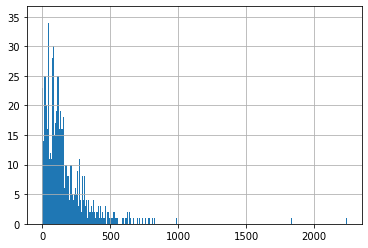

In [57]:
import matplotlib.pyplot as plt
%matplotlib inline
pd.Series(len_arr).hist(bins=1000)
plt.show()


In [58]:
len_arr.describe()

count    2172.000000
mean      170.829190
std       173.743602
min         0.000000
25%        60.000000
50%       123.000000
75%       221.000000
max      2237.000000
Name: commentsReview, dtype: float64

Most of the reviews are less than **500 words**

In [59]:
y_train_review_sequence=y_train_review_df
y_test_review_sequence=y_test_review_df

In [60]:
y_test_review_sequence

214     1
1814    1
2347    1
3035    1
457     1
       ..
1160    1
195     1
1097    1
530     1
2992    1
Name: rank_bin, Length: 932, dtype: int64

In [61]:
y_train_review_sequence

1542    1
1888    1
2395    1
1362    1
2856    1
       ..
1669    0
1334    1
3096    1
1051    1
1432    1
Name: rank_bin, Length: 2172, dtype: int64

In [62]:
X_train_review_sequence.shape

(2172, 100)

In [63]:

# Convolution
kernel_size = 5
filters = 128
pool_size = 4


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
embedding (Embedding)        (None, 100, 50)           50000     
_________________________________________________________________
lstm (LSTM)                  (None, 100, 192)          186624    
_________________________________________________________________
dense (Dense)                (None, 100, 128)          24704     
_________________________________________________________________
lstm_1 (LSTM)                (None, 128)               131584    
_________________________________________________________________
dense_1 (Dense)              (None, 32)                4128      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 33        
Total params: 397,073
Trainable params: 397,073
Non-trainable params: 0
__________________________________________________

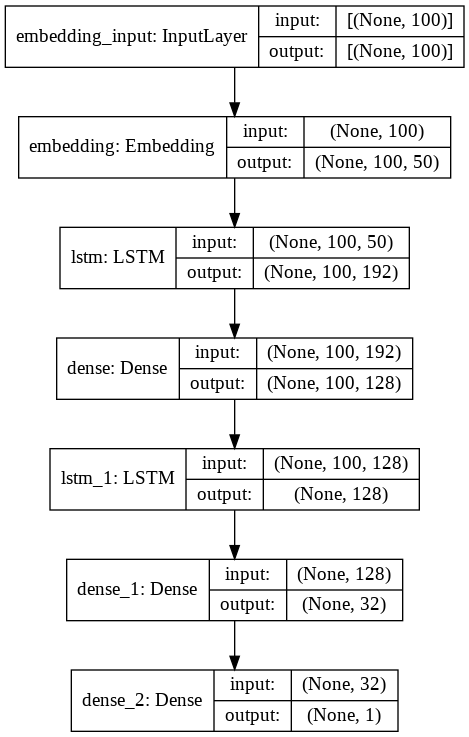

In [64]:
from keras import Sequential
from keras.layers import Embedding, LSTM, Dense, Dropout,SpatialDropout1D,Conv1D,MaxPooling1D
embedding_size=50
vocabulary_size=VOC_SIZE
max_words=MAX_SEQUENCE_LENGTH
"""
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(Dropout(0.15))
model.add(Conv1D(filters,kernel_size, padding='valid',activation='relu',strides=1))
model.add(MaxPooling1D(pool_size=pool_size))
model.add(LSTM(196, return_sequences=True, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(128, activation='relu'))
model.add(LSTM(64, dropout=0.2, recurrent_dropout=0.2))
model.add(Dense(1, activation='sigmoid'))
model.summary()"""

'''
model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(192, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(128,activation='relu'))
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())'''
from keras.utils.vis_utils import plot_model




model=Sequential()
model.add(Embedding(vocabulary_size, embedding_size, input_length=max_words))
model.add(LSTM(192, return_sequences=True, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(128,activation='relu'))
model.add(LSTM(128, dropout=0.3, recurrent_dropout=0.2))
model.add(Dense(32,activation='relu'))
model.add(Dense(1, activation='sigmoid'))
print(model.summary())
plot_model(model, to_file='model_plot.png', show_shapes=True, show_layer_names=True)

In [65]:
model.compile(loss='binary_crossentropy', 
             optimizer='RMSprop', 
             metrics=['accuracy'])

#### Normal Model fitting

In [66]:
def get_category(res):
  val=[]
  for i in res:
    if(i[0]<0.5):
      val.append(0)
    else:
      val.append(1)
  return val

In [67]:
top_5_class=pd.DataFrame(columns=["Batch","Epoch","Train","Test"])

In [68]:
'''batch_size = 32
num_epochs = 2'''
batch_size = 8
num_epochs = 4
history = model.fit(X_train_review_sequence, y_train_review_sequence, validation_data=(X_test_review_sequence, y_test_review_sequence), batch_size=batch_size, epochs=num_epochs)


Epoch 1/4
272/272 [==============================] - 190s 583ms/step - loss: 0.6020 - accuracy: 0.7322 - val_loss: 0.5805 - val_accuracy: 0.7361
Epoch 2/4
272/272 [==============================] - 160s 587ms/step - loss: 0.5605 - accuracy: 0.7260 - val_loss: 0.5534 - val_accuracy: 0.7414
Epoch 3/4
272/272 [==============================] - 159s 584ms/step - loss: 0.5049 - accuracy: 0.7757 - val_loss: 0.7741 - val_accuracy: 0.6899
Epoch 4/4
272/272 [==============================] - 161s 591ms/step - loss: 0.4825 - accuracy: 0.7835 - val_loss: 0.5653 - val_accuracy: 0.7393


In [69]:
get_performance_class(model,X_train_review_sequence,y_train_review_sequence)

[[ 269  304]
 [  85 1514]]
0.7081503819468319
              precision    recall  f1-score   support

           0       0.76      0.47      0.58       573
           1       0.83      0.95      0.89      1599

    accuracy                           0.82      2172
   macro avg       0.80      0.71      0.73      2172
weighted avg       0.81      0.82      0.81      2172



0.7081503819468319

In [70]:
get_performance_class(model,X_test_review_sequence,y_test_review_sequence)

[[ 59 187]
 [ 56 630]]
0.5791023726563796
              precision    recall  f1-score   support

           0       0.51      0.24      0.33       246
           1       0.77      0.92      0.84       686

    accuracy                           0.74       932
   macro avg       0.64      0.58      0.58       932
weighted avg       0.70      0.74      0.70       932



0.5791023726563796

### Copying train result (to merge with regression)

In [ ]:
y_test_pred_index=y_test_review_sequence

In [ ]:
pred_value=get_category(model.predict(X_test_review_sequence))

In [ ]:
i=0
for index, value in y_test_pred_index.items():
  print(y_test_pred_index[index],pred_value[i])
  y_test_pred_index[index]=pred_value[i]
  i=i+1


1 1
1 0
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
0 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
0 1
1 1
1 1
0 0
0 1
1 1
1 1
1 1
0 1
0 1
0 1
1 1
0 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 0
0 1
1 1
1 1
1 0
1 1
0 1
0 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 0
0 0
1 1
0 1
1 1
1 0
0 0
1 1
0 0
0 1
0 1
1 0
1 1
0 0
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
0 0
1 1
0 1
0 1
1 1
1 1
1 1
1 0
1 1
0 1
1 1
0 0
1 1
1 0
1 0
0 1
1 1
0 0
1 1
1 1
1 1
1 1
0 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
0 1
1 1
0 1
1 0
0 1
0 1
1 1
1 1
1 1
0 1
0 1
0 0
1 0
1 1
1 1
0 0
0 1
1 1
1 1
1 1
0 1
0 1
1 0
1 1
1 1
1 1
1 1
0 1
0 1
0 0
1 1
1 1
1 1
0 1
1 1
0 0
0 1
1 1
1 0
1 1
0 1
0 1
0 1
1 0
1 1
1 1
1 1
1 1
0 1
1 1
0 1
1 0
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
0 1
0 1
1 1
0 1
1 1
1 1
1 0
1 1
1 1
1 1
0 1
1 1
1 1
0 0
0 1
1 1
1 1
0 1
1 1
0 0
0 1
1 0
1 0
1 1
1 1


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


0
1 1
1 1
0 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
0 0
1 1
1 1
1 1
0 1
1 1
1 0
1 1
1 1
1 1
1 1
0 1
0 0
1 1
0 0
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
0 1
1 1
1 1
1 1
0 1
0 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
0 0
1 1
0 1
1 1
1 1
1 1
1 1
1 1
0 1
0 1
1 1
1 1
0 1
0 1
1 1
1 1
0 0
0 1
1 1
1 0
1 1
1 1
0 1
0 1
1 0
1 1
1 1
1 1
1 1
0 1
1 1
0 1
1 1
0 0
1 0
1 1
1 1
1 1
0 0
1 1
1 0
1 1
0 1
0 1
0 1
0 1
0 0
0 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
0 1
1 1
1 1
1 1
0 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 0
1 1
1 1
1 1
1 1
1 1
0 0
0 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 0
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 0
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
0 1
1 1
1 1
1 1
0 1
1 1
1 1
0 1
1 1
0 1
0 0
1 1
0 1
0 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
0 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 0
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 0
0 1
1 1
1 

In [ ]:
y_test_pred_index

214     1
1814    0
2347    1
3035    1
457     1
       ..
1160    1
195     1
1097    1
530     1
2992    1
Name: rank_bin, Length: 932, dtype: int64

In [ ]:
y_train_pred_index=y_train_review_sequence

In [ ]:
train_pred_value=get_category(model.predict(X_train_review_sequence))

In [ ]:
i=0
for index, value in y_train_pred_index.items():
  print(y_train_pred_index[index],train_pred_value[i])
  y_train_pred_index[index]=train_pred_value[i]
  i=i+1

1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 0
1 1
1 1
0 0
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 0
0 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 0
1 0
0 1
1 1
1 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
0 1
0 0
1 1
0 0
1 0
0 0
1 1
1 1
1 0
0 1
1 1
1 1
1 1
1 1
0 0
0 1
0 1
0 1
1 1
0 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
0 0
1 1
0 1
0 0
1 1
0 0
1 1
0 0
0 0
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
0 1
1 1
1 1
0 1
1 1
1 1
0 1
0 0
1 1
1 1
0 1
1 1
0 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 1
1 1
0 1
0 1
0 0
1 1
1 1
0 0
1 1
0 1
1 1
1 1
1 1
1 1
0 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 1
1 1
1 1
0 1
0 0
1 1
0 0
0 0
0 0
1 1
1 1
1 1
0 1
1 1
1 0
0 1
1 1
0 0
0 0
1 1
1 1
0 0
0 1
1 1
0 0
1 1
0 1
0 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
0 0


/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:4: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  after removing the cwd from sys.path.


1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
0 1
1 1
1 1
1 0
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
0 1
0 1
1 1
1 1
0 0
0 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
0 0
1 1
0 1
1 1
1 1
0 1
1 1
1 1
1 0
1 1
0 0
0 1
0 0
0 1
1 1
1 1
1 1
0 0
1 1
1 1
1 1
1 1
0 1
1 1
0 1
1 1
1 1
1 1
0 1
1 1
1 1
0 1
0 0
1 1
1 1
1 1
0 0
1 1
1 1
0 0
1 1
1 1
0 0
1 1
0 0
1 1
1 1
0 1
0 0
0 0
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 0
0 1
1 1
1 1
1 1
0 1
0 0
1 1
1 1
1 1
1 1
0 1
0 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 0
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
1 1
1 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
0 1
0 0
1 1
1 1
0 1
0 0
0 0
1 1
0 0
1 1
0 0
1 1
1 1
0 1
1 1
0 0
1 1
0 1
0 1
0 0
1 1
1 1
0 0
1 1
1 1
1 1
1 1
1 1
1 1
1 1
1 1
0 1
1 1
0 0
1 1
0 1
1 1
1 1
1 1
0 1
1 1
1 1
1 1
1 1
1 1
0 1
0 0
1 1
0 0
1 1
1 1
1 1
1 0
1 1
0 0
1 1
0 1
0 1
1 1
0 0
1 1
1 1
1 1
0 0
1 1
1 0
1 0
1 1
0 1
1 1
1 1
1 1
0 1
0 1
1 1
1 1
0 0
1 1
0 1
1 1
1 1
0 1
1 1
1 

# Merged:Categorical Data Preprocessing

One hot encoding

In [ ]:
strat_train_set.head()

,rating,effectiveness,sideEffects,commentsReview,rank_bin
1542,10,Highly Effective,No Side Effects,I had a heart scan after experiencing exercise...,1
1888,9,Highly Effective,Mild Side Effects,Prescribed for adult ADD. I take one per day -...,1
2395,7,Moderately Effective,Moderate Side Effects,After starting at.325mg-1.5 dose and now up to...,1
1362,8,Considerably Effective,Mild Side Effects,Taken on a daily basis at the same time everyd...,1
2856,8,Considerably Effective,No Side Effects,I took it once a day.. in the beginning it wor...,1


Creating X_train and y_train

In [ ]:
X_train=strat_train_set[["effectiveness","sideEffects","rank_bin"]]

In [ ]:
X_train.head()

,effectiveness,sideEffects,rank_bin
1542,Highly Effective,No Side Effects,1
1888,Highly Effective,Mild Side Effects,1
2395,Moderately Effective,Moderate Side Effects,1
1362,Considerably Effective,Mild Side Effects,1
2856,Considerably Effective,No Side Effects,1


In [ ]:
y_train=strat_train_set["rating"]

In [ ]:
y_train.head()

1542    10
1888     9
2395     7
1362     8
2856     8
Name: rating, dtype: int64

Creating X_test and y_test

In [ ]:
X_test=strat_test_set[["effectiveness","sideEffects","rank_bin"]]

In [ ]:
X_test.head()

,effectiveness,sideEffects,rank_bin
214,Highly Effective,Moderate Side Effects,1
1814,Considerably Effective,No Side Effects,0
2347,Highly Effective,Mild Side Effects,1
3035,Highly Effective,Moderate Side Effects,1
457,Highly Effective,No Side Effects,1


Merging test result from previous model

In [ ]:
from tqdm import tqdm

for i, row in tqdm(X_test.iterrows()):
  X_test.at[i,'rank_bin']=y_test_pred_index[i]


932it [00:00, 7163.67it/s]


In [ ]:
y_test_pred_index

214     1
1814    0
2347    1
3035    1
457     1
       ..
1160    1
195     1
1097    1
530     1
2992    1
Name: rank_bin, Length: 932, dtype: int64

In [ ]:
y_test=strat_test_set["rating"]

In [ ]:
y_test.head()

214      8
1814     6
2347     9
3035     9
457     10
Name: rating, dtype: int64

In [ ]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder

In [ ]:
ct=ColumnTransformer(transformers=[('encoder',OneHotEncoder(sparse=False,drop='first'),[0,1,2])])

In [ ]:
X_train=ct.fit_transform(X_train)
X_test=ct.transform(X_test)

In [ ]:
X_train=pd.DataFrame(data=X_train,columns=ct.get_feature_names())
X_test=pd.DataFrame(data=X_test,columns=ct.get_feature_names())

In [ ]:
X_train.head()

,encoder__x0_Highly Effective,encoder__x0_Ineffective,encoder__x0_Marginally Effective,encoder__x0_Moderately Effective,encoder__x1_Mild Side Effects,encoder__x1_Moderate Side Effects,encoder__x1_No Side Effects,encoder__x1_Severe Side Effects,encoder__x2_1
0,1.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0
1,1.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
2,0.0,0.0,0.0,1.0,0.0,1.0,0.0,0.0,1.0
3,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,1.0
4,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,1.0


# Categorical Model: Random Forest

## Normal Model

In [ ]:
from sklearn.model_selection import GridSearchCV
# Create the parameter grid based on the results of random search 
param_grid = {
    'bootstrap': [True],
    'max_depth': [600],
    'max_features': [5,6,7,8],
#    'max_features':['auto', 'sqrt'],

    'min_samples_leaf': [2,4,8,10,15],
    'min_samples_split': [10,20,40,50],
    'n_estimators': [25,50,100,200,300]
}

In [ ]:
from sklearn.ensemble import RandomForestRegressor
rf = RandomForestRegressor()
# Instantiate the grid search model
grid_search = GridSearchCV(estimator = rf, param_grid = param_grid, 
                          cv = 3, n_jobs = -1, verbose = 3)
grid_search.fit(X_train, y_train)

Fitting 3 folds for each of 400 candidates, totalling 1200 fits


[Parallel(n_jobs=-1)]: Using backend LokyBackend with 2 concurrent workers.
[Parallel(n_jobs=-1)]: Done  28 tasks      | elapsed:    6.5s
[Parallel(n_jobs=-1)]: Done 124 tasks      | elapsed:   24.1s
[Parallel(n_jobs=-1)]: Done 284 tasks      | elapsed:   54.0s
[Parallel(n_jobs=-1)]: Done 508 tasks      | elapsed:  1.6min
[Parallel(n_jobs=-1)]: Done 796 tasks      | elapsed:  2.5min
[Parallel(n_jobs=-1)]: Done 1148 tasks      | elapsed:  3.6min
[Parallel(n_jobs=-1)]: Done 1200 out of 1200 | elapsed:  3.8min finished


GridSearchCV(cv=3, error_score=nan,
             estimator=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0,
                                             criterion='mse', max_depth=None,
                                             max_features='auto',
                                             max_leaf_nodes=None,
                                             max_samples=None,
                                             min_impurity_decrease=0.0,
                                             min_impurity_split=None,
                                             min_samples_leaf=1,
                                             min_samples_split=2,
                                             min_weight_fraction_leaf=0.0,
                                             n_estimators=100, n_jobs=None,
                                             oob_score=False, random_state=None,
                                             verbose=0, warm_start=False),
             iid='deprecated', n_jo

In [ ]:
model=grid_search.best_estimator_

In [ ]:
model

RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=600, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=50, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)

Performance

In [ ]:
def get_performance_R(model,X,y):
  y_pred = model.predict(X)
  from sklearn.metrics import r2_score
  return(r2_score(y, y_pred))

get_performance_R(model,X_train,y_train)


0.8022949538926847

In [ ]:
get_performance_R(model,X_test,y_test)


0.774017850295655

In [ ]:
X_train.columns.to_list()

['encoder__x0_Highly Effective',
 'encoder__x0_Ineffective',
 'encoder__x0_Marginally Effective',
 'encoder__x0_Moderately Effective',
 'encoder__x1_Mild Side Effects',
 'encoder__x1_Moderate Side Effects',
 'encoder__x1_No Side Effects',
 'encoder__x1_Severe Side Effects',
 'encoder__x2_1']

In [ ]:
for name, score in zip(X_train.columns.to_list(), model.feature_importances_):
  print(name, score)

encoder__x0_Highly Effective 0.2687430556837851
encoder__x0_Ineffective 0.27586824388751824
encoder__x0_Marginally Effective 0.063588516958218
encoder__x0_Moderately Effective 0.03287597722607793
encoder__x1_Mild Side Effects 0.061700283143792056
encoder__x1_Moderate Side Effects 0.04903106918451451
encoder__x1_No Side Effects 0.03324558505364829
encoder__x1_Severe Side Effects 0.10939178261208563
encoder__x2_1 0.10555548625036021


##

## (OR) Feature Selected 

In [ ]:
from itertools import chain,combinations
from sklearn.svm import SVC
from sklearn.model_selection import GridSearchCV
import tqdm
import warnings
warnings.filterwarnings('ignore') 

from sklearn.ensemble import RandomForestRegressor
# Instantiate the grid search model


def power_set(iterable):
    s=(iterable)
    return chain.from_iterable(combinations(s,r) for r in range(2,len(s)+1)) #Update here

In [ ]:
print(list(power_set(X_train.columns.values)))

[('encoder__x0_Highly Effective', 'encoder__x0_Ineffective'), ('encoder__x0_Highly Effective', 'encoder__x0_Marginally Effective'), ('encoder__x0_Highly Effective', 'encoder__x0_Moderately Effective'), ('encoder__x0_Highly Effective', 'encoder__x1_Mild Side Effects'), ('encoder__x0_Highly Effective', 'encoder__x1_Moderate Side Effects'), ('encoder__x0_Highly Effective', 'encoder__x1_No Side Effects'), ('encoder__x0_Highly Effective', 'encoder__x1_Severe Side Effects'), ('encoder__x0_Highly Effective', 'encoder__x2_1'), ('encoder__x0_Ineffective', 'encoder__x0_Marginally Effective'), ('encoder__x0_Ineffective', 'encoder__x0_Moderately Effective'), ('encoder__x0_Ineffective', 'encoder__x1_Mild Side Effects'), ('encoder__x0_Ineffective', 'encoder__x1_Moderate Side Effects'), ('encoder__x0_Ineffective', 'encoder__x1_No Side Effects'), ('encoder__x0_Ineffective', 'encoder__x1_Severe Side Effects'), ('encoder__x0_Ineffective', 'encoder__x2_1'), ('encoder__x0_Marginally Effective', 'encoder__

In [ ]:
top_5=pd.DataFrame(columns=["F","Train","Test"])

In [ ]:
 i=0
 for feature in tqdm.tqdm(list(power_set(X_train.columns.values))):
    rf = RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=600, max_features=X_train[list(feature)].shape[1], max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=200, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
    rf.fit(X_train[list(feature)],y_train)
   # if(float((get_performance_R(rf,X_train[list(feature)],y_train)))>0.80):
   #   print(feature)
    top_5=top_5.append({'F':feature,"Train":get_performance_R(rf,X_train[list(feature)],y_train),"Test":get_performance_R(rf,X_test[list(feature)],y_test)},ignore_index=True)
    print("Train",get_performance_R(rf,X_train[list(feature)],y_train) )
    print("Test",get_performance_R(rf,X_test[list(feature)],y_test))



  0%|          | 1/502 [00:00<03:28,  2.40it/s]

Train 0.45199435427819556
Test 0.47238026382545173



  0%|          | 2/502 [00:00<03:33,  2.34it/s]

Train 0.3227466252293988
Test 0.3054724418278585



  1%|          | 3/502 [00:01<03:34,  2.33it/s]

Train 0.2824137397756389
Test 0.26945359434257077



  1%|          | 4/502 [00:01<03:38,  2.28it/s]

Train 0.3641655287304333
Test 0.32589306352357794



  1%|          | 5/502 [00:02<03:38,  2.27it/s]

Train 0.29289279561946124
Test 0.2763062274758684



  1%|          | 6/502 [00:02<03:38,  2.27it/s]

Train 0.3489603525212276
Test 0.35327884266148457



  1%|▏         | 7/502 [00:03<03:34,  2.31it/s]

Train 0.4202348993031466
Test 0.3644260335175381



  2%|▏         | 8/502 [00:03<03:36,  2.28it/s]

Train 0.39425846789796204
Test 0.2944881546636815



  2%|▏         | 9/502 [00:03<03:33,  2.31it/s]

Train 0.4137209530596109
Test 0.44034325734021695



  2%|▏         | 10/502 [00:04<03:31,  2.33it/s]

Train 0.36015474185985663
Test 0.40499501713725183



  2%|▏         | 11/502 [00:04<03:32,  2.31it/s]

Train 0.3209627847970735
Test 0.3657284281152593



  2%|▏         | 12/502 [00:05<03:32,  2.31it/s]

Train 0.30580605439190045
Test 0.3503869323930391



  3%|▎         | 13/502 [00:05<03:30,  2.32it/s]

Train 0.3813010032556855
Test 0.4119294591339575



  3%|▎         | 14/502 [00:06<03:29,  2.33it/s]

Train 0.42901494151317554
Test 0.44209389202895133



  3%|▎         | 15/502 [00:06<03:29,  2.33it/s]

Train 0.40227611305638344
Test 0.31783275357920504



  3%|▎         | 16/502 [00:06<03:32,  2.29it/s]

Train 0.16151411368656732
Test 0.1432661754423067



  3%|▎         | 17/502 [00:07<03:32,  2.28it/s]

Train 0.16295406352856556
Test 0.1559100393480497



  4%|▎         | 18/502 [00:07<03:35,  2.24it/s]

Train 0.11835844570167064
Test 0.10205554816116869



  4%|▍         | 19/502 [00:08<03:32,  2.27it/s]

Train 0.22045444787446833
Test 0.20468849344967277



  4%|▍         | 20/502 [00:08<03:31,  2.28it/s]

Train 0.27990238953984736
Test 0.20987708931366067



  4%|▍         | 21/502 [00:09<03:29,  2.30it/s]

Train 0.24827279389746004
Test 0.11702415698201085



  4%|▍         | 22/502 [00:09<03:29,  2.29it/s]

Train 0.11398810251414904
Test 0.12214279760518498



  5%|▍         | 23/502 [00:10<03:32,  2.26it/s]

Train 0.06410119969800743
Test 0.049419167175949186



  5%|▍         | 24/502 [00:10<03:32,  2.24it/s]

Train 0.16928926292090973
Test 0.14985238691602465



  5%|▍         | 25/502 [00:10<03:30,  2.27it/s]

Train 0.2405939503952499
Test 0.18525594133893986



  5%|▌         | 26/502 [00:11<03:28,  2.28it/s]

Train 0.21312304965378637
Test 0.07142646044291656



  5%|▌         | 27/502 [00:11<03:28,  2.28it/s]

Train 0.07446165232194812
Test 0.08200278795399862



  6%|▌         | 28/502 [00:12<03:27,  2.29it/s]

Train 0.3748506603619789
Test 0.3716460295566365



  6%|▌         | 29/502 [00:12<03:27,  2.28it/s]

Train 0.22469413641688596
Test 0.18171036978454924



  6%|▌         | 30/502 [00:13<03:24,  2.31it/s]

Train 0.2230259597144999
Test 0.10516466509610534



  6%|▌         | 31/502 [00:13<03:22,  2.33it/s]

Train 0.13354875092308305
Test 0.12267898627644047



  6%|▋         | 32/502 [00:13<03:20,  2.34it/s]

Train 0.24939921631090212
Test 0.17830620034703382



  7%|▋         | 33/502 [00:14<03:17,  2.37it/s]

Train 0.19620824618132016
Test 0.04019297652398934



  7%|▋         | 34/502 [00:14<03:16,  2.38it/s]

Train 0.26788116450756727
Test 0.22034503957348572



  7%|▋         | 35/502 [00:15<03:16,  2.37it/s]

Train 0.2617461205985596
Test 0.14846047586089706



  7%|▋         | 36/502 [00:15<03:18,  2.35it/s]

Train 0.3084267781572698
Test 0.14925487573978102



  7%|▋         | 37/502 [00:16<03:21,  2.30it/s]

Train 0.5217425541362704
Test 0.5381469733588571



  8%|▊         | 38/502 [00:16<03:23,  2.28it/s]

Train 0.4682837143041595
Test 0.49270392481452274



  8%|▊         | 39/502 [00:17<03:27,  2.23it/s]

Train 0.4972225796675308
Test 0.49904723602698875



  8%|▊         | 40/502 [00:17<03:26,  2.23it/s]

Train 0.4652788313326156
Test 0.4855570258670959



  8%|▊         | 41/502 [00:17<03:28,  2.21it/s]

Train 0.507634970803684
Test 0.538607196237046



  8%|▊         | 42/502 [00:18<03:27,  2.21it/s]

Train 0.5645880406523426
Test 0.5592615933668423



  9%|▊         | 43/502 [00:18<03:26,  2.23it/s]

Train 0.5390535608473976
Test 0.4747788176328681



  9%|▉         | 44/502 [00:19<03:22,  2.26it/s]

Train 0.32841467336609886
Test 0.31046236584272424



  9%|▉         | 45/502 [00:19<03:24,  2.24it/s]

Train 0.39797787176063437
Test 0.3578077543614776



  9%|▉         | 46/502 [00:20<03:26,  2.21it/s]

Train 0.3343355230588435
Test 0.31403944503741377



  9%|▉         | 47/502 [00:20<03:27,  2.20it/s]

Train 0.3885354670793708
Test 0.39054254467801996



 10%|▉         | 48/502 [00:21<03:24,  2.21it/s]

Train 0.456225990771859
Test 0.3930693586953734



 10%|▉         | 49/502 [00:21<03:22,  2.24it/s]

Train 0.427463042614489
Test 0.3348075455657624



 10%|▉         | 50/502 [00:21<03:23,  2.22it/s]

Train 0.36734696836627645
Test 0.3292222225769722



 10%|█         | 51/502 [00:22<03:25,  2.20it/s]

Train 0.2949723657142659
Test 0.2754509996585306



 10%|█         | 52/502 [00:22<03:27,  2.16it/s]

Train 0.35081340647707904
Test 0.35338364173473913



 11%|█         | 53/502 [00:23<03:22,  2.22it/s]

Train 0.42252383221196366
Test 0.3686476056602793



 11%|█         | 54/502 [00:23<03:22,  2.22it/s]

Train 0.3979356895929369
Test 0.297390763230597



 11%|█         | 55/502 [00:24<03:23,  2.20it/s]

Train 0.3778824957035367
Test 0.3333916871482083



 11%|█         | 56/502 [00:24<03:24,  2.19it/s]

Train 0.5333893377686322
Test 0.5176423902262608



 11%|█▏        | 57/502 [00:25<03:24,  2.18it/s]

Train 0.4588984768850678
Test 0.3966017013405886



 12%|█▏        | 58/502 [00:25<03:22,  2.19it/s]

Train 0.45590079528864347
Test 0.3451678363533499



 12%|█▏        | 59/502 [00:26<03:25,  2.15it/s]

Train 0.3521037953527225
Test 0.35665010275397646



 12%|█▏        | 60/502 [00:26<03:23,  2.17it/s]

Train 0.4486763740949865
Test 0.3821867123730781



 12%|█▏        | 61/502 [00:27<03:22,  2.18it/s]

Train 0.41298697872139745
Test 0.30660382412997944



 12%|█▏        | 62/502 [00:27<03:21,  2.19it/s]

Train 0.4521216371188487
Test 0.41487147031814064



 13%|█▎        | 63/502 [00:27<03:19,  2.20it/s]

Train 0.44476434562702216
Test 0.3695730291803293



 13%|█▎        | 64/502 [00:28<03:16,  2.22it/s]

Train 0.5012647107651542
Test 0.38248844821451233



 13%|█▎        | 65/502 [00:28<03:19,  2.19it/s]

Train 0.5134731117553639
Test 0.5416541819896744



 13%|█▎        | 66/502 [00:29<03:16,  2.22it/s]

Train 0.44085847898305186
Test 0.4667358288956085



 13%|█▎        | 67/502 [00:29<03:16,  2.21it/s]

Train 0.43286385574728004
Test 0.4670515782163237



 14%|█▎        | 68/502 [00:30<03:15,  2.22it/s]

Train 0.493872137243867
Test 0.5191059595405997



 14%|█▎        | 69/502 [00:30<03:15,  2.21it/s]

Train 0.5283636155885754
Test 0.5301481705353916



 14%|█▍        | 70/502 [00:31<03:14,  2.22it/s]

Train 0.4998196135952391
Test 0.4369506599713886



 14%|█▍        | 71/502 [00:31<03:12,  2.24it/s]

Train 0.39243692066610325
Test 0.4373174307230908



 14%|█▍        | 72/502 [00:31<03:12,  2.24it/s]

Train 0.38013419937408655
Test 0.4194838270430291



 15%|█▍        | 73/502 [00:32<03:10,  2.25it/s]

Train 0.44267093079671094
Test 0.46922397673619354



 15%|█▍        | 74/502 [00:32<03:10,  2.25it/s]

Train 0.4924798363855736
Test 0.5099321695041474



 15%|█▍        | 75/502 [00:33<03:08,  2.27it/s]

Train 0.4661322641997193
Test 0.3973728875203403



 15%|█▌        | 76/502 [00:33<03:09,  2.25it/s]

Train 0.3282509477487878
Test 0.3736046324519592



 15%|█▌        | 77/502 [00:34<03:09,  2.24it/s]

Train 0.537845702918205
Test 0.5665469983111288



 16%|█▌        | 78/502 [00:34<03:07,  2.26it/s]

Train 0.43947135573887564
Test 0.4553991190013228



 16%|█▌        | 79/502 [00:35<03:09,  2.23it/s]

Train 0.4317286569988086
Test 0.3619301492470165



 16%|█▌        | 80/502 [00:35<03:08,  2.24it/s]

Train 0.38315138216419253
Test 0.4161331145668573



 16%|█▌        | 81/502 [00:35<03:09,  2.23it/s]

Train 0.4737346291340905
Test 0.48872247953644443



 16%|█▋        | 82/502 [00:36<03:09,  2.22it/s]

Train 0.4273554319307227
Test 0.34106048855231086



 17%|█▋        | 83/502 [00:36<03:10,  2.20it/s]

Train 0.4804986667653083
Test 0.4940880214307899



 17%|█▋        | 84/502 [00:37<03:09,  2.20it/s]

Train 0.4729101296266379
Test 0.41359658320563886



 17%|█▋        | 85/502 [00:37<03:09,  2.20it/s]

Train 0.4987930373793221
Test 0.42190909269197086



 17%|█▋        | 86/502 [00:38<03:08,  2.21it/s]

Train 0.21913157194498667
Test 0.20627034166655434



 17%|█▋        | 87/502 [00:38<03:07,  2.21it/s]

Train 0.1779976882310813
Test 0.15059726433225384



 18%|█▊        | 88/502 [00:39<03:06,  2.22it/s]

Train 0.26874182871487085
Test 0.24246162542820815



 18%|█▊        | 89/502 [00:39<03:06,  2.21it/s]

Train 0.3321969801786999
Test 0.2609749322277548



 18%|█▊        | 90/502 [00:40<03:05,  2.22it/s]

Train 0.3009480910337827
Test 0.1786169555269208



 18%|█▊        | 91/502 [00:40<03:07,  2.20it/s]

Train 0.16568715304093018
Test 0.15674480498140742



 18%|█▊        | 92/502 [00:40<03:08,  2.18it/s]

Train 0.4390183768316833
Test 0.43315339672354514



 19%|█▊        | 93/502 [00:41<03:06,  2.19it/s]

Train 0.302088838377938
Test 0.24190846275683298



 19%|█▊        | 94/502 [00:41<03:04,  2.21it/s]

Train 0.295160215200976
Test 0.18579260420497268



 19%|█▉        | 95/502 [00:42<03:05,  2.20it/s]

Train 0.22075360299304747
Test 0.20504899548624922



 19%|█▉        | 96/502 [00:42<03:03,  2.21it/s]

Train 0.3233142615960608
Test 0.24450011295785967



 19%|█▉        | 97/502 [00:43<03:02,  2.22it/s]

Train 0.2714876385174462
Test 0.13493239274544244



 20%|█▉        | 98/502 [00:43<03:02,  2.22it/s]

Train 0.34249288131797206
Test 0.28759787343355636



 20%|█▉        | 99/502 [00:44<03:01,  2.22it/s]

Train 0.3321855637338774
Test 0.23444331431717058



 20%|█▉        | 100/502 [00:44<03:01,  2.22it/s]

Train 0.3707624381140755
Test 0.22292273580326516



 20%|██        | 101/502 [00:45<02:59,  2.23it/s]

Train 0.12016258457889828
Test 0.11743301138087059



 20%|██        | 102/502 [00:45<03:01,  2.20it/s]

Train 0.40524388166209
Test 0.39273479717314175



 21%|██        | 103/502 [00:45<03:01,  2.20it/s]

Train 0.26429519035647075
Test 0.22149182518208832



 21%|██        | 104/502 [00:46<02:59,  2.21it/s]

Train 0.26483696794041955
Test 0.15068222901063877



 21%|██        | 105/502 [00:46<02:58,  2.22it/s]

Train 0.17141276077766399
Test 0.14737383311529728



 21%|██        | 106/502 [00:47<03:01,  2.19it/s]

Train 0.28675635034124736
Test 0.2072279147578845



 21%|██▏       | 107/502 [00:47<02:59,  2.20it/s]

Train 0.23653579722439477
Test 0.08032433786785964



 22%|██▏       | 108/502 [00:48<02:56,  2.23it/s]

Train 0.3029160607417657
Test 0.24875061857958336



 22%|██▏       | 109/502 [00:48<02:58,  2.21it/s]

Train 0.2975646203934391
Test 0.1801687525765442



 22%|██▏       | 110/502 [00:49<02:57,  2.21it/s]

Train 0.34639473494696693
Test 0.1929118475332634



 22%|██▏       | 111/502 [00:49<02:58,  2.19it/s]

Train 0.48431850590748193
Test 0.5016107906723273



 22%|██▏       | 112/502 [00:50<02:57,  2.20it/s]

Train 0.2548527293340237
Test 0.19159528069739973



 23%|██▎       | 113/502 [00:50<02:56,  2.20it/s]

Train 0.23875359511259353
Test 0.10466943874012613



 23%|██▎       | 114/502 [00:50<02:57,  2.19it/s]

Train 0.40364387372544597
Test 0.3862830499226796



 23%|██▎       | 115/502 [00:51<02:55,  2.20it/s]

Train 0.43156744918433243
Test 0.37483967151229114



 23%|██▎       | 116/502 [00:51<02:58,  2.16it/s]

Train 0.33086200339918426
Test 0.19228906068425755



 23%|██▎       | 117/502 [00:52<02:57,  2.16it/s]

Train 0.28498319114539383
Test 0.22763493390432699



 24%|██▎       | 118/502 [00:52<02:56,  2.18it/s]

Train 0.2702735049093664
Test 0.14832658438324797



 24%|██▎       | 119/502 [00:53<02:56,  2.17it/s]

Train 0.35102302968807164
Test 0.18609261576231795



 24%|██▍       | 120/502 [00:53<02:56,  2.16it/s]

Train 0.35751789319486704
Test 0.22886086363619762



 24%|██▍       | 121/502 [00:54<02:54,  2.18it/s]

Train 0.559406982931006
Test 0.579835101939159



 24%|██▍       | 122/502 [00:54<02:57,  2.14it/s]

Train 0.5564838668435308
Test 0.557067132105501



 25%|██▍       | 123/502 [00:55<02:55,  2.15it/s]

Train 0.5350680941512265
Test 0.5530769195611049



 25%|██▍       | 124/502 [00:55<02:55,  2.15it/s]

Train 0.5732844198860559
Test 0.6018011742554128



 25%|██▍       | 125/502 [00:56<02:56,  2.13it/s]

Train 0.6198031922221388
Test 0.6106101966918378



 25%|██▌       | 126/502 [00:56<02:55,  2.14it/s]

Train 0.5921922927163552
Test 0.5411864114614222



 25%|██▌       | 127/502 [00:57<02:58,  2.10it/s]

Train 0.5101446195476759
Test 0.5171081810859353



 25%|██▌       | 128/502 [00:57<02:56,  2.12it/s]

Train 0.48262963757783595
Test 0.5032259152043062



 26%|██▌       | 129/502 [00:57<02:58,  2.09it/s]

Train 0.5228139630386355
Test 0.5515148125475281



 26%|██▌       | 130/502 [00:58<02:57,  2.10it/s]

Train 0.5792927488114666
Test 0.5790487507860423



 26%|██▌       | 131/502 [00:58<02:58,  2.08it/s]

Train 0.5545710422332617
Test 0.49517609332975776



 26%|██▋       | 132/502 [00:59<02:57,  2.08it/s]

Train 0.5065544425436227
Test 0.5018805014645938



 26%|██▋       | 133/502 [00:59<03:00,  2.04it/s]

Train 0.6367972653937852
Test 0.6513218257664798



 27%|██▋       | 134/502 [01:00<02:58,  2.07it/s]

Train 0.5823850498994814
Test 0.5690545113755672



 27%|██▋       | 135/502 [01:00<02:58,  2.05it/s]

Train 0.5751092570752393
Test 0.5024052980158444



 27%|██▋       | 136/502 [01:01<02:57,  2.06it/s]

Train 0.5100931684071806
Test 0.5408224461007315



 27%|██▋       | 137/502 [01:01<02:56,  2.06it/s]

Train 0.5933659731269969
Test 0.5877407333335993



 27%|██▋       | 138/502 [01:02<02:59,  2.03it/s]

Train 0.5584276125974772
Test 0.48902003137207073



 28%|██▊       | 139/502 [01:02<02:58,  2.03it/s]

Train 0.5919879514717544
Test 0.5977306813455475



 28%|██▊       | 140/502 [01:03<02:57,  2.04it/s]

Train 0.5821884961668637
Test 0.5378067041671417



 28%|██▊       | 141/502 [01:03<02:55,  2.06it/s]

Train 0.6223852374149932
Test 0.5556355761041707



 28%|██▊       | 142/502 [01:04<02:52,  2.09it/s]

Train 0.404124635759048
Test 0.36451307355803564



 28%|██▊       | 143/502 [01:04<02:50,  2.10it/s]

Train 0.34064413257657133
Test 0.3171641236426309



 29%|██▊       | 144/502 [01:05<02:50,  2.10it/s]

Train 0.3945855870802817
Test 0.3921293263876857



 29%|██▉       | 145/502 [01:05<02:50,  2.09it/s]

Train 0.4629442294902083
Test 0.4012074252397222



 29%|██▉       | 146/502 [01:06<02:47,  2.12it/s]

Train 0.43531532486713
Test 0.34284053001471493



 29%|██▉       | 147/502 [01:06<02:50,  2.08it/s]

Train 0.41141591799820465
Test 0.3635431288193024



 29%|██▉       | 148/502 [01:07<02:54,  2.03it/s]

Train 0.5638203412306144
Test 0.5495134232203185



 30%|██▉       | 149/502 [01:07<02:56,  2.00it/s]

Train 0.4913438934756593
Test 0.4228842849089428



 30%|██▉       | 150/502 [01:08<03:03,  1.92it/s]

Train 0.48520799582512564
Test 0.37985765174042596



 30%|███       | 151/502 [01:08<03:05,  1.89it/s]

Train 0.39173867036103815
Test 0.39307429376149183



 30%|███       | 152/502 [01:09<03:06,  1.88it/s]

Train 0.48301907764299346
Test 0.4113440134367712



 30%|███       | 153/502 [01:09<03:12,  1.81it/s]

Train 0.4464276498709012
Test 0.3468530248867151



 31%|███       | 154/502 [01:10<03:18,  1.75it/s]

Train 0.4880314532429201
Test 0.4459867941797585



 31%|███       | 155/502 [01:11<03:21,  1.72it/s]

Train 0.4771306200116433
Test 0.40930495415056833



 31%|███       | 156/502 [01:11<03:20,  1.72it/s]

Train 0.5289876636633759
Test 0.415093143286551



 31%|███▏      | 157/502 [01:12<03:28,  1.65it/s]

Train 0.3812821401834615
Test 0.3365379936306381



 31%|███▏      | 158/502 [01:13<03:29,  1.64it/s]

Train 0.5397077821520291
Test 0.5248302459773699



 32%|███▏      | 159/502 [01:13<03:26,  1.66it/s]

Train 0.46224979022469626
Test 0.40200742728745387



 32%|███▏      | 160/502 [01:14<03:17,  1.73it/s]

Train 0.4593350042392724
Test 0.35006973929526863



 32%|███▏      | 161/502 [01:14<03:10,  1.79it/s]

Train 0.3547177472510702
Test 0.3547060576110418



 32%|███▏      | 162/502 [01:15<03:02,  1.86it/s]

Train 0.4518440798684952
Test 0.3836402264451022



 32%|███▏      | 163/502 [01:15<02:57,  1.91it/s]

Train 0.41722930998637897
Test 0.30678366729027495



 33%|███▎      | 164/502 [01:16<02:57,  1.91it/s]

Train 0.4546440340761655
Test 0.41760228209574735



 33%|███▎      | 165/502 [01:16<02:55,  1.92it/s]

Train 0.4492918032164235
Test 0.3697782276471451



 33%|███▎      | 166/502 [01:17<02:50,  1.97it/s]

Train 0.505765983238005
Test 0.38756045767872116



 33%|███▎      | 167/502 [01:17<02:52,  1.94it/s]

Train 0.6217872397314477
Test 0.6225031588347759



 33%|███▎      | 168/502 [01:18<02:48,  1.98it/s]

Train 0.47521093431819195
Test 0.40725094439077913



 34%|███▎      | 169/502 [01:18<02:45,  2.01it/s]

Train 0.47526357204154346
Test 0.35252187771192933



 34%|███▍      | 170/502 [01:19<02:45,  2.00it/s]

Train 0.5568590205017134
Test 0.5283132359169069



 34%|███▍      | 171/502 [01:19<02:43,  2.02it/s]

Train 0.5836217573398542
Test 0.5200562105968867



 34%|███▍      | 172/502 [01:20<02:42,  2.03it/s]

Train 0.5305069406663663
Test 0.4092398493535113



 34%|███▍      | 173/502 [01:20<02:43,  2.02it/s]

Train 0.46394798101790957
Test 0.4167924854084727



 35%|███▍      | 174/502 [01:21<02:41,  2.04it/s]

Train 0.4546152156891863
Test 0.3717955792744829



 35%|███▍      | 175/502 [01:21<02:40,  2.04it/s]

Train 0.5317458406860389
Test 0.40698851125263735



 35%|███▌      | 176/502 [01:22<02:40,  2.03it/s]

Train 0.5260222833915106
Test 0.4252050725707538



 35%|███▌      | 177/502 [01:22<02:38,  2.06it/s]

Train 0.5373808411610506
Test 0.5606751680556332



 35%|███▌      | 178/502 [01:23<02:35,  2.09it/s]

Train 0.5302301638307313
Test 0.5574311021481622



 36%|███▌      | 179/502 [01:23<02:34,  2.09it/s]

Train 0.5767641113580269
Test 0.5965769392889856



 36%|███▌      | 180/502 [01:23<02:33,  2.10it/s]

Train 0.6102215977913494
Test 0.6129250108948732



 36%|███▌      | 181/502 [01:24<02:31,  2.12it/s]

Train 0.5823506525679141
Test 0.5427166748518443



 36%|███▋      | 182/502 [01:24<02:31,  2.11it/s]

Train 0.4493099224613857
Test 0.479471819483544



 36%|███▋      | 183/502 [01:25<02:31,  2.10it/s]

Train 0.621179821219539
Test 0.646559170745395



 37%|███▋      | 184/502 [01:25<02:29,  2.12it/s]

Train 0.5372950973322012
Test 0.537833604734632



 37%|███▋      | 185/502 [01:26<02:29,  2.12it/s]

Train 0.5242116100921534
Test 0.46867451859934983



 37%|███▋      | 186/502 [01:26<02:29,  2.11it/s]

Train 0.49588753944263475
Test 0.5246757600605336



 37%|███▋      | 187/502 [01:27<02:30,  2.09it/s]

Train 0.5658046531444857
Test 0.5752136960456872



 37%|███▋      | 188/502 [01:27<02:29,  2.10it/s]

Train 0.5228893227255662
Test 0.46229316135424947



 38%|███▊      | 189/502 [01:28<02:29,  2.09it/s]

Train 0.5733776212714743
Test 0.5814712811810727



 38%|███▊      | 190/502 [01:28<02:29,  2.09it/s]

Train 0.5638103339851381
Test 0.5238140525693146



 38%|███▊      | 191/502 [01:29<02:28,  2.09it/s]

Train 0.5782622066291789
Test 0.518028349398755



 38%|███▊      | 192/502 [01:29<02:28,  2.09it/s]

Train 0.4041641157915675
Test 0.44068847623020646



 38%|███▊      | 193/502 [01:30<02:28,  2.08it/s]

Train 0.5827582829026121
Test 0.6011155211284432



 39%|███▊      | 194/502 [01:30<02:29,  2.06it/s]

Train 0.5021709693623231
Test 0.5206402666349331



 39%|███▉      | 195/502 [01:31<02:27,  2.08it/s]

Train 0.4967790650319135
Test 0.4349407092596289



 39%|███▉      | 196/502 [01:31<02:27,  2.07it/s]

Train 0.4466734969117071
Test 0.4704511125340697



 39%|███▉      | 197/502 [01:32<02:28,  2.05it/s]

Train 0.5310971382626106
Test 0.5402807035697589



 39%|███▉      | 198/502 [01:32<02:27,  2.06it/s]

Train 0.48869963010898976
Test 0.410078387129974



 40%|███▉      | 199/502 [01:33<02:25,  2.09it/s]

Train 0.5358530805110688
Test 0.5459842761356661



 40%|███▉      | 200/502 [01:33<02:22,  2.12it/s]

Train 0.5275493769776354
Test 0.47216804801383894



 40%|████      | 201/502 [01:34<02:22,  2.11it/s]

Train 0.5551211877973723
Test 0.4916344456714652



 40%|████      | 202/502 [01:34<02:22,  2.10it/s]

Train 0.6144439129350621
Test 0.6441365128926917



 40%|████      | 203/502 [01:34<02:22,  2.09it/s]

Train 0.4754399914030145
Test 0.4890477373783866



 41%|████      | 204/502 [01:35<02:22,  2.09it/s]

Train 0.4516684580254807
Test 0.36978756854570727



 41%|████      | 205/502 [01:35<02:24,  2.05it/s]

Train 0.5633127523012869
Test 0.5851532682153155



 41%|████      | 206/502 [01:36<02:23,  2.06it/s]

Train 0.582617909963337
Test 0.563328630930449



 41%|████      | 207/502 [01:36<02:23,  2.05it/s]

Train 0.5111123326119226
Test 0.4405010783554292



 41%|████▏     | 208/502 [01:37<02:23,  2.05it/s]

Train 0.49807625084333684
Test 0.513902884866907



 42%|████▏     | 209/502 [01:37<02:21,  2.07it/s]

Train 0.48287430475841564
Test 0.4173222830993969



 42%|████▏     | 210/502 [01:38<02:19,  2.09it/s]

Train 0.5370488990761506
Test 0.4679797993271029



 42%|████▏     | 211/502 [01:38<02:17,  2.11it/s]

Train 0.5401418545736134
Test 0.48323703538356166



 42%|████▏     | 212/502 [01:39<02:17,  2.11it/s]

Train 0.22541237183764085
Test 0.20393793681160532



 42%|████▏     | 213/502 [01:39<02:18,  2.08it/s]

Train 0.4768836767062168
Test 0.4591324214548155



 43%|████▎     | 214/502 [01:40<02:16,  2.11it/s]

Train 0.3528720127884284
Test 0.28991238223924065



 43%|████▎     | 215/502 [01:40<02:16,  2.10it/s]

Train 0.3481014607041488
Test 0.24247992224632153



 43%|████▎     | 216/502 [01:41<02:16,  2.10it/s]

Train 0.2707660464681736
Test 0.24026466073444508



 43%|████▎     | 217/502 [01:41<02:14,  2.13it/s]

Train 0.37023223321796606
Test 0.2809238091668973



 43%|████▎     | 218/502 [01:42<02:13,  2.12it/s]

Train 0.32189762707366254
Test 0.1878847333341529



 44%|████▎     | 219/502 [01:42<02:15,  2.09it/s]

Train 0.38743886079626877
Test 0.3234327321010094



 44%|████▍     | 220/502 [01:43<02:14,  2.10it/s]

Train 0.37715121909853055
Test 0.2770183355139654



 44%|████▍     | 221/502 [01:43<02:15,  2.08it/s]

Train 0.4176368828607847
Test 0.27734612511012946



 44%|████▍     | 222/502 [01:44<02:13,  2.11it/s]

Train 0.5472149519409997
Test 0.5577246553010162



 44%|████▍     | 223/502 [01:44<02:11,  2.12it/s]

Train 0.3289842358137397
Test 0.25510941578712065



 45%|████▍     | 224/502 [01:45<02:11,  2.11it/s]

Train 0.3111118102973929
Test 0.18814587340905775



 45%|████▍     | 225/502 [01:45<02:10,  2.12it/s]

Train 0.4663309983857218
Test 0.4442949071693908



 45%|████▌     | 226/502 [01:45<02:11,  2.09it/s]

Train 0.4889836085198003
Test 0.44163983630732095



 45%|████▌     | 227/502 [01:46<02:12,  2.08it/s]

Train 0.39143121962854843
Test 0.26077927808632384



 45%|████▌     | 228/502 [01:46<02:12,  2.07it/s]

Train 0.3569251796571613
Test 0.2946496585761974



 46%|████▌     | 229/502 [01:47<02:12,  2.06it/s]

Train 0.340857712784856
Test 0.23372578467361427



 46%|████▌     | 230/502 [01:47<02:12,  2.05it/s]

Train 0.4087093572129573
Test 0.258571653517077



 46%|████▌     | 231/502 [01:48<02:11,  2.07it/s]

Train 0.41816709347059366
Test 0.30195721417124266



 46%|████▌     | 232/502 [01:48<02:10,  2.07it/s]

Train 0.5157090250432139
Test 0.5259746385441436



 46%|████▋     | 233/502 [01:49<02:10,  2.07it/s]

Train 0.2936989243266339
Test 0.22168737919587733



 47%|████▋     | 234/502 [01:49<02:09,  2.07it/s]

Train 0.2826311376065894
Test 0.14641180683704413



 47%|████▋     | 235/502 [01:50<02:09,  2.06it/s]

Train 0.43429988505152006
Test 0.4066819036873728



 47%|████▋     | 236/502 [01:50<02:08,  2.07it/s]

Train 0.46251493409317346
Test 0.40004560636995135



 47%|████▋     | 237/502 [01:51<02:07,  2.07it/s]

Train 0.37019079750765504
Test 0.2350270527624274



 47%|████▋     | 238/502 [01:51<02:07,  2.07it/s]

Train 0.31946839395048665
Test 0.2507289130343713



 48%|████▊     | 239/502 [01:52<02:07,  2.06it/s]

Train 0.3066439087338494
Test 0.17756792949991107



 48%|████▊     | 240/502 [01:52<02:08,  2.04it/s]

Train 0.38493094731013533
Test 0.21834373690613507



 48%|████▊     | 241/502 [01:53<02:07,  2.04it/s]

Train 0.39179920758423614
Test 0.26052115007639043



 48%|████▊     | 242/502 [01:53<02:07,  2.04it/s]

Train 0.497880685875019
Test 0.5265888310394986



 48%|████▊     | 243/502 [01:54<02:05,  2.06it/s]

Train 0.5144094715110831
Test 0.48786616695687957



 49%|████▊     | 244/502 [01:54<02:03,  2.08it/s]

Train 0.3669975191217012
Test 0.209019901140027



 49%|████▉     | 245/502 [01:55<02:04,  2.06it/s]

Train 0.45471582951516243
Test 0.38646938949171017



 49%|████▉     | 246/502 [01:55<02:03,  2.08it/s]

Train 0.37780241945284765
Test 0.23768100712373874



 49%|████▉     | 247/502 [01:56<02:04,  2.05it/s]

Train 0.5883627027730012
Test 0.5957624942295328



 49%|████▉     | 248/502 [01:56<02:04,  2.03it/s]

Train 0.5732769262995476
Test 0.5919716247660366



 50%|████▉     | 249/502 [01:57<02:06,  2.01it/s]

Train 0.608267819240744
Test 0.6322605311600094



 50%|████▉     | 250/502 [01:57<02:06,  1.99it/s]

Train 0.6503709052318902
Test 0.6458430387997188



 50%|█████     | 251/502 [01:58<02:05,  2.00it/s]

Train 0.62320275118033
Test 0.5834744547957671



 50%|█████     | 252/502 [01:58<02:05,  1.99it/s]

Train 0.5652118385392049
Test 0.5599692007260064



 50%|█████     | 253/502 [01:59<02:05,  1.99it/s]

Train 0.6850759258815662
Test 0.702123451021657



 51%|█████     | 254/502 [01:59<02:05,  1.98it/s]

Train 0.6338328152851946
Test 0.6172057011518342



 51%|█████     | 255/502 [02:00<02:05,  1.97it/s]

Train 0.6226824493965606
Test 0.561224231498751



 51%|█████     | 256/502 [02:00<02:04,  1.97it/s]

Train 0.5757262160377792
Test 0.6041163318626193



 51%|█████     | 257/502 [02:01<02:03,  1.98it/s]

Train 0.6463103871206953
Test 0.6401123929087175



 51%|█████▏    | 258/502 [02:01<02:04,  1.96it/s]

Train 0.6114932644894203
Test 0.5574129216881438



 52%|█████▏    | 259/502 [02:02<02:04,  1.96it/s]

Train 0.6465381850652854
Test 0.6504852860739332



 52%|█████▏    | 260/502 [02:02<02:02,  1.97it/s]

Train 0.6339856971746464
Test 0.604068803327234



 52%|█████▏    | 261/502 [02:03<02:01,  1.99it/s]

Train 0.6647691972078376
Test 0.6097679723929649



 52%|█████▏    | 262/502 [02:03<02:01,  1.98it/s]

Train 0.5211565898394994
Test 0.5208642776767897



 52%|█████▏    | 263/502 [02:04<02:01,  1.97it/s]

Train 0.64759927671733
Test 0.6600239365616822



 53%|█████▎    | 264/502 [02:04<01:59,  1.99it/s]

Train 0.5951078437231176
Test 0.5875384217822702



 53%|█████▎    | 265/502 [02:05<01:58,  2.01it/s]

Train 0.5884727250545555
Test 0.5216304134395354



 53%|█████▎    | 266/502 [02:05<01:58,  2.00it/s]

Train 0.5268839406585133
Test 0.5523468855008715



 53%|█████▎    | 267/502 [02:06<01:56,  2.01it/s]

Train 0.6077788370365789
Test 0.6026314761461214



 53%|█████▎    | 268/502 [02:06<01:56,  2.00it/s]

Train 0.574243751677102
Test 0.5069049284561



 54%|█████▎    | 269/502 [02:07<01:57,  1.98it/s]

Train 0.6061538445705044
Test 0.6124164994916684



 54%|█████▍    | 270/502 [02:07<01:59,  1.94it/s]

Train 0.5972879098241817
Test 0.5508566285586964



 54%|█████▍    | 271/502 [02:08<01:58,  1.95it/s]

Train 0.6361797314447671
Test 0.5744764151678745



 54%|█████▍    | 272/502 [02:08<01:58,  1.94it/s]

Train 0.7058616307050389
Test 0.7218227428920996



 54%|█████▍    | 273/502 [02:09<01:58,  1.93it/s]

Train 0.6019081483608697
Test 0.588781760863163



 55%|█████▍    | 274/502 [02:09<01:58,  1.92it/s]

Train 0.5927199177969574
Test 0.5075058041813969



 55%|█████▍    | 275/502 [02:10<01:56,  1.94it/s]

Train 0.6598442575218
Test 0.6652219051722152



 55%|█████▍    | 276/502 [02:10<01:57,  1.92it/s]

Train 0.6784246534093044
Test 0.6476739725442997



 55%|█████▌    | 277/502 [02:11<01:57,  1.92it/s]

Train 0.6381042063363732
Test 0.5648387947631976



 55%|█████▌    | 278/502 [02:11<01:55,  1.93it/s]

Train 0.6051252159822661
Test 0.6089985528685021



 56%|█████▌    | 279/502 [02:12<01:55,  1.94it/s]

Train 0.5921312648549588
Test 0.5403428694480925



 56%|█████▌    | 280/502 [02:12<01:54,  1.94it/s]

Train 0.651420562171982
Test 0.5859953082554026



 56%|█████▌    | 281/502 [02:13<01:53,  1.94it/s]

Train 0.6450123429760852
Test 0.592488345195869



 56%|█████▌    | 282/502 [02:14<01:52,  1.95it/s]

Train 0.4180655818661184
Test 0.3705819112633436



 56%|█████▋    | 283/502 [02:14<01:51,  1.97it/s]

Train 0.5731321000077882
Test 0.5581960806642088



 57%|█████▋    | 284/502 [02:15<01:49,  1.98it/s]

Train 0.49813171385323696
Test 0.43163256435049324



 57%|█████▋    | 285/502 [02:15<01:48,  2.00it/s]

Train 0.4920628780514884
Test 0.3883278943786057



 57%|█████▋    | 286/502 [02:16<01:48,  1.98it/s]

Train 0.3985976313101195
Test 0.39347236086596293



 57%|█████▋    | 287/502 [02:16<01:48,  1.98it/s]

Train 0.48971120089015796
Test 0.41576774772734104



 57%|█████▋    | 288/502 [02:17<01:48,  1.97it/s]

Train 0.4545967811348216
Test 0.3520439005610261



 58%|█████▊    | 289/502 [02:17<01:47,  1.98it/s]

Train 0.49494251626451913
Test 0.4506742305417757



 58%|█████▊    | 290/502 [02:18<01:46,  1.99it/s]

Train 0.4857585601209904
Test 0.4131923758292809



 58%|█████▊    | 291/502 [02:18<01:45,  2.00it/s]

Train 0.5371523348801899
Test 0.42464833946208935



 58%|█████▊    | 292/502 [02:19<01:45,  1.98it/s]

Train 0.655020342075282
Test 0.652065921451215



 58%|█████▊    | 293/502 [02:19<01:45,  1.99it/s]

Train 0.5075020135691473
Test 0.4339016292386645



 59%|█████▊    | 294/502 [02:20<01:46,  1.95it/s]

Train 0.5053590055511722
Test 0.3850694263350215



 59%|█████▉    | 295/502 [02:20<01:44,  1.98it/s]

Train 0.587732094269257
Test 0.5576405020730599



 59%|█████▉    | 296/502 [02:21<01:43,  1.99it/s]

Train 0.6106749253440726
Test 0.5530614630142312



 59%|█████▉    | 297/502 [02:21<01:42,  1.99it/s]

Train 0.5568201611438139
Test 0.4387062454523435



 59%|█████▉    | 298/502 [02:22<01:43,  1.97it/s]

Train 0.4989102258976674
Test 0.44787923629151327



 60%|█████▉    | 299/502 [02:22<01:42,  1.98it/s]

Train 0.4874313633283879
Test 0.4109429215202186



 60%|█████▉    | 300/502 [02:23<01:42,  1.96it/s]

Train 0.5581640240355494
Test 0.43951154226625677



 60%|█████▉    | 301/502 [02:23<01:43,  1.95it/s]

Train 0.5542696135965881
Test 0.45817739702122073



 60%|██████    | 302/502 [02:24<01:42,  1.95it/s]

Train 0.626872169329089
Test 0.6274023055191499



 60%|██████    | 303/502 [02:24<01:42,  1.95it/s]

Train 0.4790152062430668
Test 0.41152299217952215



 61%|██████    | 304/502 [02:25<01:43,  1.92it/s]

Train 0.4790162738798184
Test 0.3561486479429882



 61%|██████    | 305/502 [02:25<01:41,  1.94it/s]

Train 0.5628654501185042
Test 0.5341345971705772



 61%|██████    | 306/502 [02:26<01:41,  1.94it/s]

Train 0.5898892723811746
Test 0.5259814628895885



 61%|██████    | 307/502 [02:26<01:40,  1.93it/s]

Train 0.5345677785897794
Test 0.4156312072816074



 61%|██████▏   | 308/502 [02:27<01:40,  1.93it/s]

Train 0.4673185583396532
Test 0.417072239292555



 62%|██████▏   | 309/502 [02:27<01:39,  1.93it/s]

Train 0.4597560431444364
Test 0.3705889068501306



 62%|██████▏   | 310/502 [02:28<01:38,  1.95it/s]

Train 0.5366276714486196
Test 0.40749917351616105



 62%|██████▏   | 311/502 [02:28<01:38,  1.94it/s]

Train 0.5311292191986998
Test 0.42740932617038363



 62%|██████▏   | 312/502 [02:29<01:38,  1.93it/s]

Train 0.6332154561046809
Test 0.6457802573993103



 62%|██████▏   | 313/502 [02:29<01:37,  1.94it/s]

Train 0.6542212127142446
Test 0.6071425991164843



 63%|██████▎   | 314/502 [02:30<01:36,  1.94it/s]

Train 0.555877459703563
Test 0.4245741536797982



 63%|██████▎   | 315/502 [02:30<01:36,  1.95it/s]

Train 0.6042198380347396
Test 0.5271909579966096



 63%|██████▎   | 316/502 [02:31<01:37,  1.92it/s]

Train 0.5434477366455206
Test 0.4315418550505091



 63%|██████▎   | 317/502 [02:31<01:36,  1.93it/s]

Train 0.5498298406747387
Test 0.5687254597169187



 63%|██████▎   | 318/502 [02:32<01:35,  1.93it/s]

Train 0.681758410775271
Test 0.6942224172442613



 64%|██████▎   | 319/502 [02:32<01:34,  1.93it/s]

Train 0.6190042158650387
Test 0.6193703784314175



 64%|██████▎   | 320/502 [02:33<01:33,  1.94it/s]

Train 0.6081441756023618
Test 0.5661525169497947



 64%|██████▍   | 321/502 [02:33<01:32,  1.95it/s]

Train 0.5807420068589856
Test 0.5992316104346254



 64%|██████▍   | 322/502 [02:34<01:33,  1.93it/s]

Train 0.6395260666144886
Test 0.6409314524350993



 64%|██████▍   | 323/502 [02:34<01:31,  1.96it/s]

Train 0.6018555269088088
Test 0.5574321817587935



 65%|██████▍   | 324/502 [02:35<01:29,  1.98it/s]

Train 0.6457179597755647
Test 0.6474433033710476



 65%|██████▍   | 325/502 [02:35<01:29,  1.98it/s]

Train 0.6349068108217215
Test 0.6037239259889904



 65%|██████▍   | 326/502 [02:36<01:27,  2.00it/s]

Train 0.6510502183113044
Test 0.6069418406493357



 65%|██████▌   | 327/502 [02:36<01:28,  1.98it/s]

Train 0.6891192211324754
Test 0.7105465156127189



 65%|██████▌   | 328/502 [02:37<01:27,  1.99it/s]

Train 0.5691372042091868
Test 0.5755568614736247



 66%|██████▌   | 329/502 [02:37<01:27,  1.98it/s]

Train 0.544117604995515
Test 0.48176081412884797



 66%|██████▌   | 330/502 [02:38<01:26,  1.99it/s]

Train 0.6425641072638824
Test 0.6598229377793834



 66%|██████▌   | 331/502 [02:38<01:25,  1.99it/s]

Train 0.6568934708609827
Test 0.6471891437315918



 66%|██████▌   | 332/502 [02:39<01:25,  2.00it/s]

Train 0.5883707753993714
Test 0.5300544720659841



 66%|██████▋   | 333/502 [02:39<01:24,  2.01it/s]

Train 0.5877636449737318
Test 0.5999001720831068



 67%|██████▋   | 334/502 [02:40<01:23,  2.02it/s]

Train 0.5737902795033472
Test 0.5286944446258566



 67%|██████▋   | 335/502 [02:40<01:24,  1.99it/s]

Train 0.6114754071556356
Test 0.5622074695879543



 67%|██████▋   | 336/502 [02:41<01:23,  1.99it/s]

Train 0.6180539075953728
Test 0.5751262232972343



 67%|██████▋   | 337/502 [02:41<01:23,  1.99it/s]

Train 0.6579040013359574
Test 0.6778817729639381



 67%|██████▋   | 338/502 [02:42<01:22,  1.99it/s]

Train 0.5355601272294604
Test 0.5427159696463493



 68%|██████▊   | 339/502 [02:42<01:22,  1.98it/s]

Train 0.5188735582031068
Test 0.4378362475730926



 68%|██████▊   | 340/502 [02:43<01:21,  1.99it/s]

Train 0.608170913665009
Test 0.6190429527300607



 68%|██████▊   | 341/502 [02:44<01:21,  1.97it/s]

Train 0.6272688209692073
Test 0.6019119985283207



 68%|██████▊   | 342/502 [02:44<01:21,  1.96it/s]

Train 0.5696316153041168
Test 0.5077498266322438



 68%|██████▊   | 343/502 [02:45<01:21,  1.95it/s]

Train 0.5517912255817995
Test 0.55978735699865



 69%|██████▊   | 344/502 [02:45<01:20,  1.96it/s]

Train 0.5378825707930925
Test 0.4727938673011881



 69%|██████▊   | 345/502 [02:46<01:19,  1.97it/s]

Train 0.5878505590065997
Test 0.5239812775685705



 69%|██████▉   | 346/502 [02:46<01:19,  1.97it/s]

Train 0.5908038571660272
Test 0.5354013203569463



 69%|██████▉   | 347/502 [02:47<01:17,  1.99it/s]

Train 0.6251328018741138
Test 0.660373006969531



 69%|██████▉   | 348/502 [02:47<01:17,  1.98it/s]

Train 0.636280682039634
Test 0.6291890850658106



 70%|██████▉   | 349/502 [02:48<01:17,  1.98it/s]

Train 0.5489864970956664
Test 0.4736685445689983



 70%|██████▉   | 350/502 [02:48<01:18,  1.94it/s]

Train 0.6013751800736336
Test 0.5776624339190866



 70%|██████▉   | 351/502 [02:49<01:19,  1.91it/s]

Train 0.5594723670659489
Test 0.5014865234953597



 70%|███████   | 352/502 [02:49<01:17,  1.93it/s]

Train 0.5860800470501186
Test 0.5887344264317725



 70%|███████   | 353/502 [02:50<01:17,  1.92it/s]

Train 0.3775338367481412
Test 0.2929146784257437



 71%|███████   | 354/502 [02:50<01:16,  1.94it/s]

Train 0.3655898452650309
Test 0.2416913608342639



 71%|███████   | 355/502 [02:51<01:15,  1.95it/s]

Train 0.5042290718816553
Test 0.46951091268782075



 71%|███████   | 356/502 [02:51<01:15,  1.95it/s]

Train 0.5268566757583727
Test 0.47318163090242016



 71%|███████   | 357/502 [02:52<01:14,  1.95it/s]

Train 0.439771460525885
Test 0.3128040766976433



 71%|███████▏  | 358/502 [02:52<01:14,  1.94it/s]

Train 0.40046255533010455
Test 0.32545007567767836



 72%|███████▏  | 359/502 [02:53<01:13,  1.95it/s]

Train 0.3861007538361739
Test 0.2750391545098815



 72%|███████▏  | 360/502 [02:53<01:13,  1.93it/s]

Train 0.45034270538134524
Test 0.30048114285189964



 72%|███████▏  | 361/502 [02:54<01:13,  1.93it/s]

Train 0.46029369430740963
Test 0.3406348811374267



 72%|███████▏  | 362/502 [02:54<01:11,  1.95it/s]

Train 0.5616213888249604
Test 0.5839252108873216



 72%|███████▏  | 363/502 [02:55<01:11,  1.95it/s]

Train 0.5714831750647562
Test 0.5476868980852923



 73%|███████▎  | 364/502 [02:55<01:10,  1.96it/s]

Train 0.4235526449489466
Test 0.27929878456450874



 73%|███████▎  | 365/502 [02:56<01:09,  1.97it/s]

Train 0.5098283588043688
Test 0.44962631937098607



 73%|███████▎  | 366/502 [02:56<01:09,  1.96it/s]

Train 0.436256777767025
Test 0.30883929668279464



 73%|███████▎  | 367/502 [02:57<01:07,  1.99it/s]

Train 0.5294214242178703
Test 0.5512263484667743



 73%|███████▎  | 368/502 [02:57<01:07,  1.98it/s]

Train 0.546138721365034
Test 0.5148332982116048



 74%|███████▎  | 369/502 [02:58<01:07,  1.97it/s]

Train 0.4045104698786366
Test 0.2416776101847815



 74%|███████▎  | 370/502 [02:58<01:07,  1.96it/s]

Train 0.48613738839926945
Test 0.4105021294103227



 74%|███████▍  | 371/502 [02:59<01:07,  1.95it/s]

Train 0.4102873854076351
Test 0.2631852446094032



 74%|███████▍  | 372/502 [02:59<01:06,  1.95it/s]

Train 0.5272471997620454
Test 0.5160512221372324



 74%|███████▍  | 373/502 [03:00<01:06,  1.95it/s]

Train 0.5994060269422291
Test 0.600373583584326



 75%|███████▍  | 374/502 [03:00<01:06,  1.93it/s]

Train 0.7090357587085385
Test 0.7209928449118268



 75%|███████▍  | 375/502 [03:01<01:05,  1.92it/s]

Train 0.6617787365207253
Test 0.6512342439473037



 75%|███████▍  | 376/502 [03:01<01:06,  1.90it/s]

Train 0.6509933891742627
Test 0.6010378341344724



 75%|███████▌  | 377/502 [03:02<01:05,  1.91it/s]

Train 0.6123717234530389
Test 0.6337371321980173



 75%|███████▌  | 378/502 [03:03<01:05,  1.89it/s]

Train 0.6749513860185883
Test 0.66886350285841



 75%|███████▌  | 379/502 [03:03<01:05,  1.87it/s]

Train 0.6420225587286845
Test 0.5954121869123079



 76%|███████▌  | 380/502 [03:04<01:05,  1.88it/s]

Train 0.6760965941502111
Test 0.6785677426534604



 76%|███████▌  | 381/502 [03:04<01:04,  1.88it/s]

Train 0.6637839135573431
Test 0.6357396478760922



 76%|███████▌  | 382/502 [03:05<01:02,  1.91it/s]

Train 0.6907774654828471
Test 0.6457404779230553



 76%|███████▋  | 383/502 [03:05<01:02,  1.91it/s]

Train 0.7503903480222547
Test 0.7615678299845892



 76%|███████▋  | 384/502 [03:06<01:02,  1.89it/s]

Train 0.653320165660688
Test 0.6394289958707133



 77%|███████▋  | 385/502 [03:06<01:01,  1.89it/s]

Train 0.640759327461845
Test 0.5666245266069379



 77%|███████▋  | 386/502 [03:07<01:01,  1.89it/s]

Train 0.7063428998612106
Test 0.7124235264298266



 77%|███████▋  | 387/502 [03:07<01:00,  1.89it/s]

Train 0.7201086390557689
Test 0.700576215397594



 77%|███████▋  | 388/502 [03:08<01:01,  1.86it/s]

Train 0.678282630211666
Test 0.6158693886226498



 77%|███████▋  | 389/502 [03:08<01:00,  1.87it/s]

Train 0.6582721254674111
Test 0.6619175914913572



 78%|███████▊  | 390/502 [03:09<00:59,  1.87it/s]

Train 0.6441474110003975
Test 0.6051905190429802



 78%|███████▊  | 391/502 [03:09<01:00,  1.85it/s]

Train 0.691882385879625
Test 0.6401536400121237



 78%|███████▊  | 392/502 [03:10<00:59,  1.84it/s]

Train 0.6879611293566872
Test 0.6480723754861213



 78%|███████▊  | 393/502 [03:11<00:59,  1.84it/s]

Train 0.7167282289434243
Test 0.7298522304270376



 78%|███████▊  | 394/502 [03:11<00:58,  1.86it/s]

Train 0.6158573507987193
Test 0.6053464038395179



 79%|███████▊  | 395/502 [03:12<00:57,  1.86it/s]

Train 0.6078409571141784
Test 0.5251494885817194



 79%|███████▉  | 396/502 [03:12<00:57,  1.84it/s]

Train 0.670849780411811
Test 0.6740264275571046



 79%|███████▉  | 397/502 [03:13<00:56,  1.85it/s]

Train 0.6894043616159615
Test 0.6558858224493666



 79%|███████▉  | 398/502 [03:13<00:55,  1.86it/s]

Train 0.6511111698001715
Test 0.5830100427716776



 79%|███████▉  | 399/502 [03:14<00:55,  1.87it/s]

Train 0.6196388084363919
Test 0.6211793496826135



 80%|███████▉  | 400/502 [03:14<00:55,  1.84it/s]

Train 0.6080949782915033
Test 0.5525189321270432



 80%|███████▉  | 401/502 [03:15<00:53,  1.88it/s]

Train 0.6643049915138846
Test 0.6000914527911473



 80%|████████  | 402/502 [03:15<00:53,  1.87it/s]

Train 0.6588200652003918
Test 0.6053567943206428



 80%|████████  | 403/502 [03:16<00:53,  1.87it/s]

Train 0.7160137728429241
Test 0.7393119591808937



 80%|████████  | 404/502 [03:16<00:52,  1.86it/s]

Train 0.7296862015875173
Test 0.7035257029457462



 81%|████████  | 405/502 [03:17<00:51,  1.87it/s]

Train 0.6653547701624565
Test 0.5864690818754639



 81%|████████  | 406/502 [03:18<00:51,  1.86it/s]

Train 0.6973450562567879
Test 0.6582630427666669



 81%|████████  | 407/502 [03:18<00:50,  1.88it/s]

Train 0.662202935616641
Test 0.6054895333944516



 81%|████████▏ | 408/502 [03:19<00:50,  1.86it/s]

Train 0.6642117256290998
Test 0.6617329260858908



 81%|████████▏ | 409/502 [03:19<00:49,  1.88it/s]

Train 0.514548221356823
Test 0.442361637282489



 82%|████████▏ | 410/502 [03:20<00:49,  1.86it/s]

Train 0.5127196483940613
Test 0.39394060463452596



 82%|████████▏ | 411/502 [03:20<00:49,  1.85it/s]

Train 0.5969258256097782
Test 0.5657968873612444



 82%|████████▏ | 412/502 [03:21<00:48,  1.87it/s]

Train 0.6200191996301185
Test 0.5605632502051701



 82%|████████▏ | 413/502 [03:21<00:47,  1.87it/s]

Train 0.564311728409999
Test 0.44931457645577577



 82%|████████▏ | 414/502 [03:22<00:46,  1.88it/s]

Train 0.506039165876248
Test 0.4500915018753424



 83%|████████▎ | 415/502 [03:22<00:46,  1.89it/s]

Train 0.4966014637580243
Test 0.4157171580282789



 83%|████████▎ | 416/502 [03:23<00:45,  1.90it/s]

Train 0.5659505382750011
Test 0.4446628789332784



 83%|████████▎ | 417/502 [03:23<00:45,  1.88it/s]

Train 0.5630987401113845
Test 0.4646166953714004



 83%|████████▎ | 418/502 [03:24<00:44,  1.89it/s]

Train 0.6665275506977684
Test 0.6757221846522237



 83%|████████▎ | 419/502 [03:24<00:44,  1.88it/s]

Train 0.684125543954778
Test 0.6369902248631698



 84%|████████▎ | 420/502 [03:25<00:43,  1.88it/s]

Train 0.5821730220282808
Test 0.4540267586316651



 84%|████████▍ | 421/502 [03:26<00:43,  1.86it/s]

Train 0.6307569584997652
Test 0.5579397515987212



 84%|████████▍ | 422/502 [03:26<00:42,  1.88it/s]

Train 0.5708593785495515
Test 0.4645179634891471



 84%|████████▍ | 423/502 [03:27<00:42,  1.86it/s]

Train 0.6382258391354794
Test 0.6499464243067599



 84%|████████▍ | 424/502 [03:27<00:41,  1.87it/s]

Train 0.6596777893830721
Test 0.6119826278649332



 85%|████████▍ | 425/502 [03:28<00:41,  1.87it/s]

Train 0.5602533363132953
Test 0.4271532967432967



 85%|████████▍ | 426/502 [03:28<00:41,  1.85it/s]

Train 0.6103231978676187
Test 0.5317303120166149



 85%|████████▌ | 427/502 [03:29<00:40,  1.85it/s]

Train 0.5488753982995196
Test 0.4313356666546333



 85%|████████▌ | 428/502 [03:29<00:40,  1.85it/s]

Train 0.6641174405598995
Test 0.6389482351681848



 85%|████████▌ | 429/502 [03:30<00:39,  1.85it/s]

Train 0.7453888055887483
Test 0.7542453203144225



 86%|████████▌ | 430/502 [03:30<00:39,  1.84it/s]

Train 0.6461476968101676
Test 0.6426281767126256



 86%|████████▌ | 431/502 [03:31<00:39,  1.82it/s]

Train 0.6294677420841301
Test 0.5737361187850808



 86%|████████▌ | 432/502 [03:31<00:37,  1.85it/s]

Train 0.7018963932779458
Test 0.7054045310546879



 86%|████████▋ | 433/502 [03:32<00:37,  1.85it/s]

Train 0.7152784190387114
Test 0.6994981459552921



 86%|████████▋ | 434/502 [03:33<00:36,  1.86it/s]

Train 0.6631134866595956
Test 0.6157257255785249



 87%|████████▋ | 435/502 [03:33<00:35,  1.86it/s]

Train 0.6573693495919706
Test 0.6589701463695585



 87%|████████▋ | 436/502 [03:34<00:35,  1.86it/s]

Train 0.6448686192622961
Test 0.6046132506887121



 87%|████████▋ | 437/502 [03:34<00:34,  1.86it/s]

Train 0.6775785376618559
Test 0.6350426754915615



 87%|████████▋ | 438/502 [03:35<00:34,  1.86it/s]

Train 0.683450293240004
Test 0.6439099074443377



 87%|████████▋ | 439/502 [03:35<00:33,  1.89it/s]

Train 0.7006574491718484
Test 0.7271744140849596



 88%|████████▊ | 440/502 [03:36<00:32,  1.89it/s]

Train 0.7058333377798263
Test 0.700275044357604



 88%|████████▊ | 441/502 [03:36<00:32,  1.89it/s]

Train 0.6212431857925222
Test 0.567111607725435



 88%|████████▊ | 442/502 [03:37<00:32,  1.86it/s]

Train 0.6718272663297606
Test 0.6565646389247136



 88%|████████▊ | 443/502 [03:37<00:31,  1.88it/s]

Train 0.6348364500919161
Test 0.5911267506699162



 88%|████████▊ | 444/502 [03:38<00:30,  1.89it/s]

Train 0.6681710070013247
Test 0.6936171505084081



 89%|████████▊ | 445/502 [03:38<00:30,  1.87it/s]

Train 0.6802384355061578
Test 0.6642483473946648



 89%|████████▉ | 446/502 [03:39<00:30,  1.86it/s]

Train 0.6044299345978069
Test 0.527815550372368



 89%|████████▉ | 447/502 [03:40<00:29,  1.86it/s]

Train 0.6463573102064231
Test 0.6150477810960984



 89%|████████▉ | 448/502 [03:40<00:28,  1.86it/s]

Train 0.6074425721668577
Test 0.547339635756307



 89%|████████▉ | 449/502 [03:41<00:29,  1.82it/s]

Train 0.6449614349961857
Test 0.6480090375034436



 90%|████████▉ | 450/502 [03:41<00:28,  1.82it/s]

Train 0.6008612272350424
Test 0.6151750600454683



 90%|████████▉ | 451/502 [03:42<00:27,  1.85it/s]

Train 0.6101599134035061
Test 0.580863552397153



 90%|█████████ | 452/502 [03:42<00:26,  1.86it/s]

Train 0.468988156515908
Test 0.32260875497623387



 90%|█████████ | 453/502 [03:43<00:26,  1.83it/s]

Train 0.5478910904675518
Test 0.4794439680885163



 90%|█████████ | 454/502 [03:43<00:26,  1.83it/s]

Train 0.4759153416214419
Test 0.34310951122035604



 91%|█████████ | 455/502 [03:44<00:25,  1.85it/s]

Train 0.5858706505539404
Test 0.5749196702436051



 91%|█████████ | 456/502 [03:44<00:24,  1.87it/s]

Train 0.5590168015591284
Test 0.5432156543441045



 91%|█████████ | 457/502 [03:45<00:24,  1.84it/s]

Train 0.7723293548069196
Test 0.7794437973806905



 91%|█████████ | 458/502 [03:45<00:24,  1.83it/s]

Train 0.6820536593998314
Test 0.6707088692689243



 91%|█████████▏| 459/502 [03:46<00:23,  1.82it/s]

Train 0.6712105821344838
Test 0.6056166666960545



 92%|█████████▏| 460/502 [03:47<00:23,  1.81it/s]

Train 0.729559961695484
Test 0.7313871787900252



 92%|█████████▏| 461/502 [03:47<00:22,  1.82it/s]

Train 0.742480868383159
Test 0.721804902787917



 92%|█████████▏| 462/502 [03:48<00:21,  1.83it/s]

Train 0.7034037578934031
Test 0.6499800914530903



 92%|█████████▏| 463/502 [03:48<00:21,  1.83it/s]

Train 0.6870626203025498
Test 0.6871812509423145



 92%|█████████▏| 464/502 [03:49<00:20,  1.82it/s]

Train 0.6744415198373857
Test 0.6372267548964299



 93%|█████████▎| 465/502 [03:49<00:20,  1.81it/s]

Train 0.7155938851623325
Test 0.6687996605074384



 93%|█████████▎| 466/502 [03:50<00:19,  1.83it/s]

Train 0.7137474377137945
Test 0.6755245925579119



 93%|█████████▎| 467/502 [03:50<00:19,  1.83it/s]

Train 0.7609663387036303
Test 0.7798246823462909



 93%|█████████▎| 468/502 [03:51<00:18,  1.82it/s]

Train 0.7693738744276944
Test 0.7454704049578168



 93%|█████████▎| 469/502 [03:52<00:18,  1.80it/s]

Train 0.704454645426093
Test 0.6378622782635254



 94%|█████████▎| 470/502 [03:52<00:17,  1.80it/s]

Train 0.7365035984786321
Test 0.7086620007031152



 94%|█████████▍| 471/502 [03:53<00:17,  1.82it/s]

Train 0.7038521607188999
Test 0.6593234155452594



 94%|█████████▍| 472/502 [03:53<00:16,  1.82it/s]

Train 0.7267477753422378
Test 0.747815887833254



 94%|█████████▍| 473/502 [03:54<00:15,  1.82it/s]

Train 0.7407157716148759
Test 0.7106062948254104



 94%|█████████▍| 474/502 [03:54<00:15,  1.82it/s]

Train 0.6794402736826057
Test 0.6007669938785796



 95%|█████████▍| 475/502 [03:55<00:14,  1.81it/s]

Train 0.7085877346408924
Test 0.6666071682187528



 95%|█████████▍| 476/502 [03:55<00:14,  1.80it/s]

Train 0.6753590499543095
Test 0.617406364938337



 95%|█████████▌| 477/502 [03:56<00:13,  1.80it/s]

Train 0.7379448663687211
Test 0.7286552541162036



 95%|█████████▌| 478/502 [03:57<00:13,  1.83it/s]

Train 0.6756231966714012
Test 0.6840267111039819



 95%|█████████▌| 479/502 [03:57<00:12,  1.80it/s]

Train 0.6935532519753765
Test 0.6468667739154956



 96%|█████████▌| 480/502 [03:58<00:12,  1.80it/s]

Train 0.5897129254433617
Test 0.46136557606058803



 96%|█████████▌| 481/502 [03:58<00:11,  1.80it/s]

Train 0.6401081153966675
Test 0.5660644258085519



 96%|█████████▌| 482/502 [03:59<00:11,  1.80it/s]

Train 0.5794342451722685
Test 0.46949927436235717



 96%|█████████▌| 483/502 [03:59<00:10,  1.80it/s]

Train 0.6943061617006636
Test 0.6684421905293441



 96%|█████████▋| 484/502 [04:00<00:09,  1.81it/s]

Train 0.6695287599209858
Test 0.6429565347693782



 97%|█████████▋| 485/502 [04:00<00:09,  1.83it/s]

Train 0.7565273563557132
Test 0.7709722546491851



 97%|█████████▋| 486/502 [04:01<00:08,  1.81it/s]

Train 0.7623603791488478
Test 0.745433559965531



 97%|█████████▋| 487/502 [04:02<00:08,  1.79it/s]

Train 0.6915560954947839
Test 0.6391907810497002



 97%|█████████▋| 488/502 [04:02<00:07,  1.80it/s]

Train 0.7298616879208899
Test 0.705237173327864



 97%|█████████▋| 489/502 [04:03<00:07,  1.79it/s]

Train 0.6968404597433062
Test 0.6536262203357814



 98%|█████████▊| 490/502 [04:03<00:06,  1.79it/s]

Train 0.7161331370097955
Test 0.7178697875954784



 98%|█████████▊| 491/502 [04:04<00:06,  1.80it/s]

Train 0.6879831066755364
Test 0.6833885188092181



 98%|█████████▊| 492/502 [04:04<00:05,  1.80it/s]

Train 0.6247846090821093
Test 0.6101403981537463



 98%|█████████▊| 493/502 [04:05<00:05,  1.79it/s]

Train 0.7828697077738872
Test 0.7975498652172947



 98%|█████████▊| 494/502 [04:05<00:04,  1.77it/s]

Train 0.7903302044210448
Test 0.7640442554259828



 99%|█████████▊| 495/502 [04:06<00:03,  1.77it/s]

Train 0.7299494774708443
Test 0.6681227422733875



 99%|█████████▉| 496/502 [04:07<00:03,  1.73it/s]

Train 0.7582017344153089
Test 0.7285930959264059



 99%|█████████▉| 497/502 [04:07<00:02,  1.71it/s]

Train 0.7278725910562547
Test 0.6845886588916628



 99%|█████████▉| 498/502 [04:08<00:02,  1.72it/s]

Train 0.778363640312522
Test 0.7708696220683404



 99%|█████████▉| 499/502 [04:08<00:01,  1.73it/s]

Train 0.7487815009802765
Test 0.7369015398982637



100%|█████████▉| 500/502 [04:09<00:01,  1.75it/s]

Train 0.7036183929707645
Test 0.6759088822346493



100%|█████████▉| 501/502 [04:09<00:00,  1.75it/s]

Train 0.7712214743725707
Test 0.7632376472667985



100%|██████████| 502/502 [04:10<00:00,  2.00it/s]

Train 0.7986249209614436
Test 0.7851916579918694


In [ ]:
top_5

,F,Train,Test
0,"(encoder__x0_Highly Effective, encoder__x0_Ine...",0.451994,0.472380
1,"(encoder__x0_Highly Effective, encoder__x0_Mar...",0.322747,0.305472
2,"(encoder__x0_Highly Effective, encoder__x0_Mod...",0.282414,0.269454
3,"(encoder__x0_Highly Effective, encoder__x1_Mil...",0.364166,0.325893
4,"(encoder__x0_Highly Effective, encoder__x1_Mod...",0.292893,0.276306
...,...,...,...
497,"(encoder__x0_Highly Effective, encoder__x0_Ine...",0.778364,0.770870
498,"(encoder__x0_Highly Effective, encoder__x0_Ine...",0.748782,0.736902
499,"(encoder__x0_Highly Effective, encoder__x0_Mar...",0.703618,0.675909
500,"(encoder__x0_Ineffective, encoder__x0_Marginal...",0.771221,0.763238


In [ ]:
top_5.sort_values(by=['Train'],ascending=False).head()

,F,Train,Test
501,"(encoder__x0_Highly Effective, encoder__x0_Ine...",0.798625,0.785192
493,"(encoder__x0_Highly Effective, encoder__x0_Ine...",0.790330,0.764044
492,"(encoder__x0_Highly Effective, encoder__x0_Ine...",0.782870,0.797550
497,"(encoder__x0_Highly Effective, encoder__x0_Ine...",0.778364,0.770870
456,"(encoder__x0_Highly Effective, encoder__x0_Ine...",0.772329,0.779444


In [ ]:
pd.set_option('max_colwidth', 400)

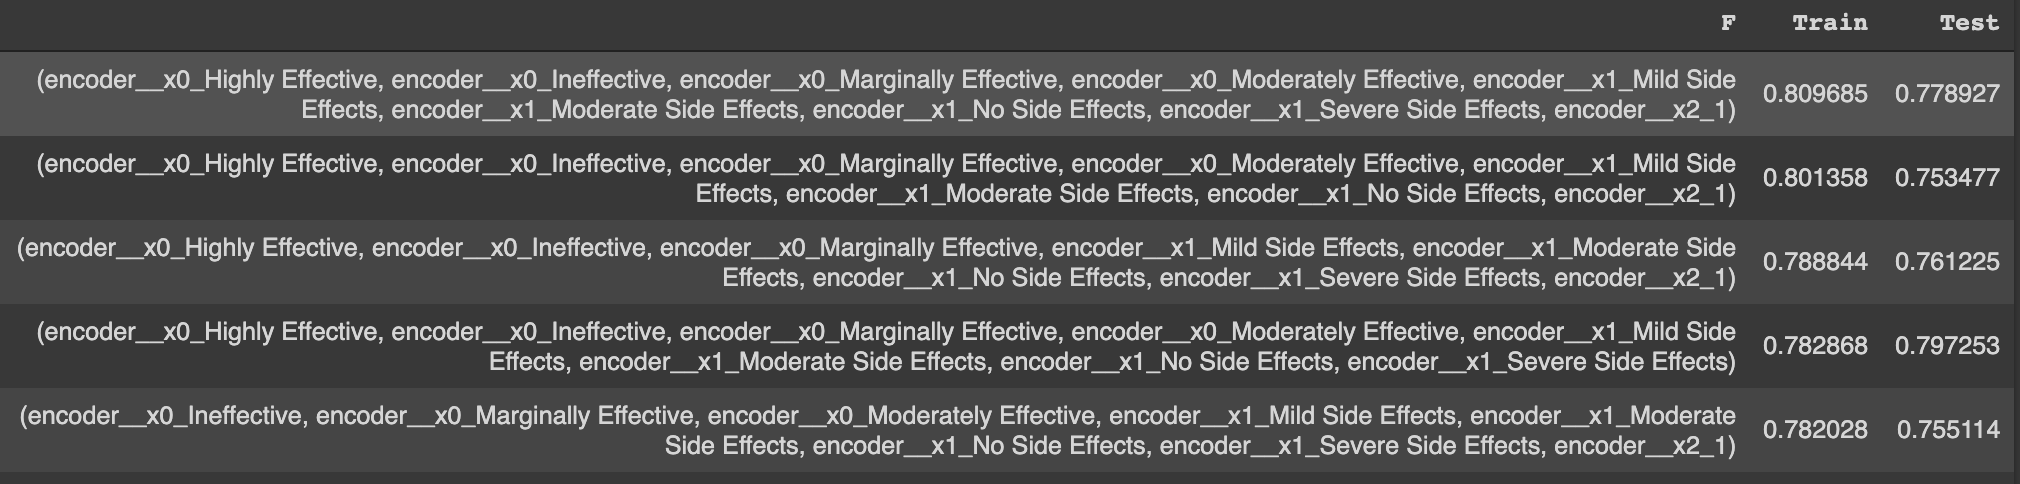

## Ensemble 1

In [ ]:

from numpy import mean
from numpy import std
from sklearn.datasets import make_regression
from sklearn.model_selection import cross_val_score
from sklearn.model_selection import RepeatedKFold
from sklearn.linear_model import LinearRegression
from sklearn.neighbors import KNeighborsRegressor
from sklearn.tree import DecisionTreeRegressor
from sklearn.ensemble import StackingRegressor
from xgboost import XGBRegressor


from sklearn.svm import SVR
from matplotlib import pyplot
# get a stacking ensemble of models
def get_stacking():
	# define the base models
  level0 = list()
  level0.append(('knn', KNeighborsRegressor()))
  level0.append(('cart', DecisionTreeRegressor()))
  level0.append(('svm', SVR()))
  level0.append(('xg',XGBRegressor()))
  level0.append(('rf',RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',max_depth=600, max_features=8, max_leaf_nodes=None,max_samples=None, min_impurity_decrease=0.0,min_impurity_split=None, min_samples_leaf=2,min_samples_split=10, min_weight_fraction_leaf=0.0,n_estimators=100, n_jobs=None, oob_score=False,random_state=None, verbose=0, warm_start=False)))
	# define meta learner model
  level1 = LinearRegression()
	# define the stacking ensemble
  model = StackingRegressor(estimators=level0, final_estimator=level1, cv=5)
  return model

In [ ]:
# get a list of models to evaluate
def get_models():
  models = dict()
  models['knn'] = KNeighborsRegressor()
  models['cart'] = DecisionTreeRegressor()
  models['svm'] = SVR()
  models['xg']=XGBRegressor()
  models['rf']=RandomForestRegressor(bootstrap=True, ccp_alpha=0.0, criterion='mse',
                      max_depth=600, max_features=8, max_leaf_nodes=None,
                      max_samples=None, min_impurity_decrease=0.0,
                      min_impurity_split=None, min_samples_leaf=2,
                      min_samples_split=10, min_weight_fraction_leaf=0.0,
                      n_estimators=100, n_jobs=None, oob_score=False,
                      random_state=None, verbose=0, warm_start=False)
  models['stacking'] = get_stacking()
  return models

In [ ]:

# evaluate a given model using cross-validation
def evaluate_model(model, X, y):
	cv = RepeatedKFold(n_splits=10, n_repeats=3, random_state=1)
	scores = cross_val_score(model, X, y, scoring='r2', cv=cv, n_jobs=-1, error_score='raise')
	return scores

>knn 0.757 (0.042)
>cart 0.782 (0.041)
>svm 0.781 (0.040)
>xg 0.775 (0.040)
>rf 0.785 (0.039)
>stacking 0.785 (0.038)


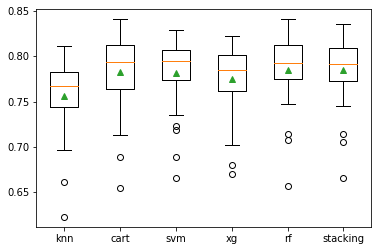

In [ ]:

models = get_models()

results, names = list(), list()
for name, model in models.items():
	scores = evaluate_model(model, X_train, y_train)
	results.append(scores)
	names.append(name)
	print('>%s %.3f (%.3f)' % (name, mean(scores), std(scores)))
# plot model performance for comparison
pyplot.boxplot(results, labels=names, showmeans=True)
pyplot.show()


## Ensemble 2

In [ ]:
from sklearn.linear_model import LogisticRegression
model1 = DecisionTreeRegressor()
model2 = KNeighborsRegressor()
model3= LogisticRegression()
model4=SVR()


model1.fit(X_train,y_train)
model2.fit(X_train,y_train)
model3.fit(X_train,y_train)
model4.fit(X_train,y_train)

pred1=model1.predict(X_train)
pred2=model2.predict(X_train)
pred3=model3.predict(X_train)
pred4=model3.predict(X_train)



In [ ]:
average_ensemble=(0.4*pred1+0.2*pred2+0.2*pred3+0.2*pred4)

In [ ]:
from sklearn.metrics import r2_score
r2_score(average_ensemble,y_train)

0.7574446009133193

In [ ]:
r2_score(pred1,y_train)

0.7542326704464328

In [ ]:
r2_score(pred2,y_train)

0.7464386379342065

In [ ]:
r2_score(pred4,y_train)

0.6965315249818957

In [ ]:
finalpred=(pred1*0.3+pred2*0.3+pred3*0.4)


## Lazy Predict Regressor

In [ ]:
#!pip install lazypredict


In [ ]:
import lazypredict


In [ ]:
X_test

,encoder__x0_Highly Effective,encoder__x0_Ineffective,encoder__x0_Marginally Effective,encoder__x0_Moderately Effective,encoder__x1_Mild Side Effects,encoder__x1_Moderate Side Effects,encoder__x1_No Side Effects,encoder__x1_Severe Side Effects,encoder__x2_1
0,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
1,0.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00
2,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
3,1.00,0.00,0.00,0.00,0.00,1.00,0.00,0.00,1.00
4,1.00,0.00,0.00,0.00,0.00,0.00,1.00,0.00,1.00
...,...,...,...,...,...,...,...,...,...
927,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
928,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00
929,1.00,0.00,0.00,0.00,0.00,0.00,0.00,1.00,1.00
930,1.00,0.00,0.00,0.00,1.00,0.00,0.00,0.00,1.00


In [ ]:
y_test

214      8
1814     6
2347     9
3035     9
457     10
        ..
1160     8
195     10
1097    10
530     10
2992     9
Name: rating, Length: 932, dtype: int64

In [ ]:
from lazypredict.Supervised import LazyRegressor
reg = LazyRegressor(verbose=0, ignore_warnings=False, custom_metric=None)
models, predictions = reg.fit(X_train, X_test, y_train,  y_test)

100%|██████████| 42/42 [00:06<00:00,  6.23it/s]


In [ ]:
models

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.79,0.79,1.33,2.14
BaggingRegressor,0.79,0.79,1.34,0.04
XGBRegressor,0.79,0.79,1.34,0.23
DecisionTreeRegressor,0.79,0.79,1.34,0.02
ExtraTreeRegressor,0.79,0.79,1.34,0.02
ExtraTreesRegressor,0.79,0.79,1.34,0.24
GaussianProcessRegressor,0.79,0.79,1.34,0.82
RandomForestRegressor,0.79,0.79,1.34,0.28
LGBMRegressor,0.79,0.79,1.35,0.07


In [ ]:
predictions

,Adjusted R-Squared,R-Squared,RMSE,Time Taken
Model,,,,
MLPRegressor,0.79,0.79,1.33,2.14
BaggingRegressor,0.79,0.79,1.34,0.04
XGBRegressor,0.79,0.79,1.34,0.23
DecisionTreeRegressor,0.79,0.79,1.34,0.02
ExtraTreeRegressor,0.79,0.79,1.34,0.02
ExtraTreesRegressor,0.79,0.79,1.34,0.24
GaussianProcessRegressor,0.79,0.79,1.34,0.82
RandomForestRegressor,0.79,0.79,1.34,0.28
LGBMRegressor,0.79,0.79,1.35,0.07
